<a href="https://colab.research.google.com/github/shreyas-sreedhar/ipl-data-analysis/blob/main/DSETM_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO6105 - ASSIGNMENT_4**

*` - Shreyas S Sreedhar 002874944`*

Dataset Link - https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020

<br/>
CSV - IPL Ball-by-Ball 2008-2020.csv
CSV 2 - IPL Matches 2008-2020.csv

MIT License

Copyright (c) 2024 Shreyas Sreedhar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# AIM:

To Analyze the raw ball to ball collected by the enthusiastic IPL fans, and clean the data i.e. Imputing missing values, dealing with outliers etc. to build a predictive model that predicts the probablity of the winner. Check with AutoML for the best model for this dataset vs what we have tried. Then perform a SHAP analysis of the data.


**Questions to be answered:**

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?
* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?  

* Intepret the SHAP values and compare them with the other model interpretability methods.

# **Installing Neccesary Libraries**

In [1]:
pip install eli5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

# **Importing Datasets**

In [3]:
ipl_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv"
)
ipl_matches_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Matches%202008-2020.csv"
)

In [4]:
# Viewing data in the file
ipl_data.head()

id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type           batting_team  \
0            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
1            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
2            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
3            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
4            NaN              NaN     NaN         NaN  Kolkata Knight Riders   

                  bowling_team  
0  Royal Challengers Bangalore  
1  Royal Challengers Bangalore  
2  Royal Challengers Bangalore  
3  Royal Challengers Bangalore  
4  Royal Challengers Bangalore

In [5]:
# Viewing the matches data in the file
ipl_matches_data.head()

id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen  
1     runs           33.0          N    NaN  MR Benson      SL Shastri  
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar  
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper  
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan

### IPL Matches 2008-2020 Matches Dataset

The dataset contains information about IPL matches played during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match, same as in the ball-by-ball dataset.
- **city**: City where the match was played.
- **date**: Date of the match.
- **player_of_match**: Player who was awarded the 'Player of the Match'.
- **venue**: Venue where the match was played.
- **neutral_venue**: Indicator if the venue was neutral.
- **team1** and **team2**: Teams playing the match.
- **toss_winner**: Team that won the toss.
- **toss_decision**: Decision made by the toss winner to bat or field.
- **winner**: Winning team of the match.
- **result**: Type of result (e.g., runs, wickets).
- **result_margin**: Margin of the win.
- **eliminator**: Indicator if the match was an eliminator.
- **method**: Any special method applied (like D/L method).
- **umpire1** and **umpire2**: Names of the umpires.




In [6]:
data=ipl_data.merge(ipl_matches_data,on='id')
data

id  inning  over  ball      batsman  non_striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193465  1237181       1    13     1      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 bowler  batsman_runs  extra_runs  total_runs  ...  \
0             AA Noffke             1           0           1  ...   
1             AA Noffke             1           0           1  ...   
2                Z Khan             0           0           0  ...   
3                Z Khan             1           0           1  ...   
4                Z Khan             1           0           1  ...   
...                 ...           ...         ...         ...  ...   
193463  NM Coulter-Nile             0           0           0  ...   
193464  NM Coulter-Nile             1           0           1  ...   
193465        KH Pandya             0           1           1  ...   
193466        KH Pandya             1           0           1  ...   
193467        KH Pandya             1           0           1  ...   

                        team2                  toss_winner toss_decision  \
0       Kolkata Knight Riders  Royal Challengers Bangalore         field   
1       Kolkata Knight Riders  Royal Challengers Bangalore         field   
2       Kolkata Knight Riders  Royal Challengers Bangalore         field   
3       Kolkata Knight Riders  Royal Challengers Bangalore         field   
4       Kolkata Knight Riders  Royal Challengers Bangalore         field   
...                       ...                          ...           ...   
193463         Mumbai Indians               Delhi Capitals           bat   
193464         Mumbai Indians               Delhi Capitals           bat   
193465         Mumbai Indians               Delhi Capitals           bat   
193466         Mumbai Indians               Delhi Capitals           bat   
193467         Mumbai Indians               Delhi Capitals           bat   

                       winner   result result_margin eliminator method  \
0       Kolkata Knight Riders     runs         140.0          N    NaN   
1       Kolkata Knight Riders     runs         140.0          N    NaN   
2       Kolkata Knight Riders     runs         140.0          N    NaN   
3       Kolkata Knight Riders     runs         140.0          N    NaN   
4       Kolkata Knight Riders     runs         140.0          N    NaN   
...                       ...      ...           ...        ...    ...   
193463         Mumbai Indians  wickets           5.0          N    NaN   
193464         Mumbai Indians  wickets           5.0          N    NaN   
193465         Mumbai Indians  wickets           5.0          N    NaN   
193466         Mumbai Indians  wickets           5.0          N    NaN   
193467         Mumbai Indians  wickets           5.0          N    NaN   

            umpire1      umpire2  
0         Asad Rauf  RE Koertzen  
1         Asad Rauf  RE Koertzen  
2         Asad Rauf  RE Koertzen  
3         Asad Rauf  RE Koertzen  
4         Asad Rauf  RE Koertzen  
...             ...          ...  
193463  CB Gaffaney  Nitin Menon  
193464  CB Gaffaney  Nitin Menon  
193465  CB Gaffaney  Nitin Menon  
193466  CB Gaffaney  Nitin Menon  
193467  CB Gaffaney  Nitin Menon  

[193468 rows x 34 columns]

# **The Data types of the Dataset**

In [7]:
data_types = data.dtypes
print(data_types)

id                    int64
inning                int64
over                  int64
ball                  int64
batsman              object
non_striker          object
bowler               object
batsman_runs          int64
extra_runs            int64
total_runs            int64
non_boundary          int64
is_wicket             int64
dismissal_kind       object
player_dismissed     object
fielder              object
extras_type          object
batting_team         object
bowling_team         object
city                 object
date                 object
player_of_match      object
venue                object
neutral_venue         int64
team1                object
team2                object
toss_winner          object
toss_decision        object
winner               object
result               object
result_margin       float64
eliminator           object
method               object
umpire1              object
umpire2              object
dtype: object


In [8]:
import pprint

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

pp = pprint.PrettyPrinter(indent=4)
print("Numeric Columns:")
pp.pprint(numeric_columns)
print("\nCategorical Columns:")
pp.pprint(categorical_columns)


Numeric Columns:
[   'id',
    'inning',
    'over',
    'ball',
    'batsman_runs',
    'extra_runs',
    'total_runs',
    'non_boundary',
    'is_wicket',
    'neutral_venue',
    'result_margin']

Categorical Columns:
[   'batsman',
    'non_striker',
    'bowler',
    'dismissal_kind',
    'player_dismissed',
    'fielder',
    'extras_type',
    'batting_team',
    'bowling_team',
    'city',
    'date',
    'player_of_match',
    'venue',
    'team1',
    'team2',
    'toss_winner',
    'toss_decision',
    'winner',
    'result',
    'eliminator',
    'method',
    'umpire1',
    'umpire2']


# Checking and fixing any missing values

In [9]:
# checking if the any data is missing
data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
city                  3139
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
dtype: int64

Columns like `dismissal_kind`, `player_dismissed`, `fielder`, `extras_type`, and `bowling_team` have missing values. The most significant number of missing values are in `dismissal_kind`, `player_dismissed`, and `fielder`. This is expected as not every ball results in a dismissal or involves a fielder.

In [10]:
# Fill missing values in 'city' column with 'Unknown'
data['city'].fillna('Unknown', inplace=True)

In [11]:
# Fill missing values in 'player_of_match', 'result', and 'eliminator' columns with 'Not Available'
cols_to_fill = ['player_of_match', 'result', 'eliminator']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')

In [12]:
# Calculate the mean of the 'result_margin' column
mean_result_margin = data['result_margin'].mean()

# Fill missing values in 'result_margin' column with the mean
data['result_margin'].fillna(mean_result_margin, inplace=True)

In [13]:
# checking if the any data is missing
data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
city                     0
date                     0
player_of_match          0
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                   0
result_margin            0
eliminator               0
method              190260
umpire1                  0
umpire2                  0
dtype: int64

In [14]:
# Filter to display rows where 'bowling_team' is missing
missing_bowling_team = data[data['bowling_team'].isnull()]
print(missing_bowling_team)

            id  inning  over  ball         batsman     non_striker  \
57048   501265       1     0     1         NV Ojha       DA Warner   
57049   501265       1     0     2       DA Warner         NV Ojha   
57050   501265       1     1     1       DA Warner         NV Ojha   
57051   501265       1     1     2         NV Ojha       DA Warner   
57052   501265       1     1     3         NV Ojha       DA Warner   
...        ...     ...   ...   ...             ...             ...   
115654  829763       1     7     3  AB de Villiers   Mandeep Singh   
115655  829763       1     8     6  AB de Villiers   Mandeep Singh   
115656  829763       1     9     1   Mandeep Singh  AB de Villiers   
115657  829763       1     8     4  AB de Villiers   Mandeep Singh   
115658  829763       1     8     5  AB de Villiers   Mandeep Singh   

             bowler  batsman_runs  extra_runs  total_runs  ...  \
57048     AC Thomas             1           0           1  ...   
57049     AC Thomas        

**Using the IPL Matches 2008-2020.csv to fill in the missing value**

Taking the `id`, `team1`, and `team2` columns from `ipl_matches_data` dataset, along with the inning information from ball-by-ball `ipl_data` dataset to solve for missing values of `bowling_team`


 *Logic* -

In the 1st inning of a cricket match, the bowling team is


-> The team that is not the `toss_winner` if `toss_decision` is 'bat'.


-> Else it's the `toss_winner`.

For the 2nd innings, it's the opposite.



In [15]:
# Merging the ball-by-ball data with the matches data on the 'id' column
merged_data = data

# Func to determine the bowling team
def get_bowling_team(row):
    if row['inning'] == 1:
        return row['team2'] if row['toss_winner'] == row['team1'] and row['toss_decision'] == 'bat' else row['team1']
    else:
        return row['team1'] if row['toss_winner'] == row['team2'] and row['toss_decision'] == 'bat' else row['team2']

# Using get_bolwing_team function to determine the bowling team of the ball_by_ball dataset.

merged_data['bowling_team'] = merged_data.apply(get_bowling_team, axis=1)

In [16]:
#displaying the heads
print(merged_data.head())

       id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  ...                  team2  \
0             1           0           1  ...  Kolkata Knight Riders   
1             1           0           1  ...  Kolkata Knight Riders   
2             0           0           0  ...  Kolkata Knight Riders   
3             1           0           1  ...  Kolkata Knight Riders   
4             1           0           1  ...  Kolkata Knight Riders   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs

In [17]:
# Checking if any data is missing in the new merged dataset
new_dataset = merged_data.isnull().sum()
print(new_dataset)


id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team             0
city                     0
date                     0
player_of_match          0
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                   0
result_margin            0
eliminator               0
method              190260
umpire1                  0
umpire2                  0
dtype: int64


In [18]:
# To drop the unwanted columns
data.drop(['id','method'],axis=1,inplace=True)

In [19]:
data.head()

inning  over  ball      batsman  non_striker     bowler  batsman_runs  \
0       1     6     5   RT Ponting  BB McCullum  AA Noffke             1   
1       1     6     6  BB McCullum   RT Ponting  AA Noffke             1   
2       1     7     1  BB McCullum   RT Ponting     Z Khan             0   
3       1     7     2  BB McCullum   RT Ponting     Z Khan             1   
4       1     7     3   RT Ponting  BB McCullum     Z Khan             1   

   extra_runs  total_runs  non_boundary  ...                        team1  \
0           0           1             0  ...  Royal Challengers Bangalore   
1           0           1             0  ...  Royal Challengers Bangalore   
2           0           0             0  ...  Royal Challengers Bangalore   
3           0           1             0  ...  Royal Challengers Bangalore   
4           0           1             0  ...  Royal Challengers Bangalore   

                   team2                  toss_winner toss_decision  \
0  Kolkata Knight Riders  Royal Challengers Bangalore         field   
1  Kolkata Knight Riders  Royal Challengers Bangalore         field   
2  Kolkata Knight Riders  Royal Challengers Bangalore         field   
3  Kolkata Knight Riders  Royal Challengers Bangalore         field   
4  Kolkata Knight Riders  Royal Challengers Bangalore         field   

                  winner result result_margin eliminator    umpire1  \
0  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
1  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
2  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
3  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   
4  Kolkata Knight Riders   runs         140.0          N  Asad Rauf   

       umpire2  
0  RE Koertzen  
1  RE Koertzen  
2  RE Koertzen  
3  RE Koertzen  
4  RE Koertzen  

[5 rows x 32 columns]

In [20]:
data.isnull().sum()

inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team             0
city                     0
date                     0
player_of_match          0
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                   0
result_margin            0
eliminator               0
umpire1                  0
umpire2                  0
dtype: int64

In [21]:
data.dropna(subset=['winner'], inplace=True)

In [22]:
data.drop(['dismissal_kind', 'player_dismissed','fielder','extras_type'], axis='columns',inplace=True)

In [23]:
data.isnull().sum()

inning             0
over               0
ball               0
batsman            0
non_striker        0
bowler             0
batsman_runs       0
extra_runs         0
total_runs         0
non_boundary       0
is_wicket          0
batting_team       0
bowling_team       0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [24]:
data.head()

inning  over  ball      batsman  non_striker     bowler  batsman_runs  \
0       1     6     5   RT Ponting  BB McCullum  AA Noffke             1   
1       1     6     6  BB McCullum   RT Ponting  AA Noffke             1   
2       1     7     1  BB McCullum   RT Ponting     Z Khan             0   
3       1     7     2  BB McCullum   RT Ponting     Z Khan             1   
4       1     7     3   RT Ponting  BB McCullum     Z Khan             1   

   extra_runs  total_runs  non_boundary  ...                        team1  \
0           0           1             0  ...  Royal Challengers Bangalore   
1           0           1             0  ...  Royal Challengers Bangalore   
2           0           0             0  ...  Royal Challengers Bangalore   
3           0           1             0  ...  Royal Challengers Bangalore   
4           0           1             0  ...  Royal Challengers Bangalore   

                   team2                  toss_winner toss_decision  \
0  Kolkata Knight Riders  Royal Challengers Bangalore         field   
1  Kolkata Knight Riders  Royal Challengers Bangalore         field   
2  Kolkata Knight Riders  Royal Challengers Bangalore         field   
3  Kolkata Knight Riders  Royal Challengers Bangalore         field   
4  Kolkata Knight Riders  Royal Challengers Bangalore         field   

                  winner result result_margin  eliminator    umpire1  \
0  Kolkata Knight Riders   runs         140.0           N  Asad Rauf   
1  Kolkata Knight Riders   runs         140.0           N  Asad Rauf   
2  Kolkata Knight Riders   runs         140.0           N  Asad Rauf   
3  Kolkata Knight Riders   runs         140.0           N  Asad Rauf   
4  Kolkata Knight Riders   runs         140.0           N  Asad Rauf   

       umpire2  
0  RE Koertzen  
1  RE Koertzen  
2  RE Koertzen  
3  RE Koertzen  
4  RE Koertzen  

[5 rows x 28 columns]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193096 entries, 0 to 193467
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   inning           193096 non-null  int64  
 1   over             193096 non-null  int64  
 2   ball             193096 non-null  int64  
 3   batsman          193096 non-null  object 
 4   non_striker      193096 non-null  object 
 5   bowler           193096 non-null  object 
 6   batsman_runs     193096 non-null  int64  
 7   extra_runs       193096 non-null  int64  
 8   total_runs       193096 non-null  int64  
 9   non_boundary     193096 non-null  int64  
 10  is_wicket        193096 non-null  int64  
 11  batting_team     193096 non-null  object 
 12  bowling_team     193096 non-null  object 
 13  city             193096 non-null  object 
 14  date             193096 non-null  object 
 15  player_of_match  193096 non-null  object 
 16  venue            193096 non-null  obje

In [26]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

We have now solved the cruicial missing datas.

# **Checking for the likely distributions of the numeric variables in the dataset**




In [27]:
new_dataset = data

In [28]:
new_dataset.describe()

inning           over           ball   batsman_runs  \
count  193096.000000  193096.000000  193096.000000  193096.000000   
mean        1.482920       9.180361       3.615973       1.239948   
std         0.499709       5.676054       1.807097       1.610550   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       4.000000       2.000000       0.000000   
50%         1.000000       9.000000       4.000000       1.000000   
75%         2.000000      14.000000       5.000000       1.000000   
max         2.000000      19.000000       9.000000       6.000000   

          extra_runs     total_runs   non_boundary      is_wicket  \
count  193096.000000  193096.000000  193096.000000  193096.000000   
mean        0.066376       1.306324       0.000083       0.049053   
std         0.340004       1.598526       0.009102       0.215980   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         7.000000       7.000000       1.000000       1.000000   

       neutral_venue  result_margin  
count  193096.000000  193096.000000  
mean        0.095010      17.340895  
std         0.293229      21.702858  
min         0.000000       1.000000  
25%         0.000000       6.000000  
50%         0.000000       8.000000  
75%         0.000000      20.000000  
max         1.000000     146.000000

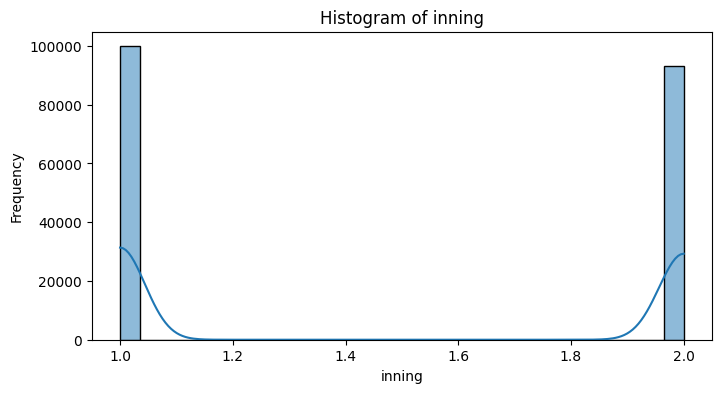

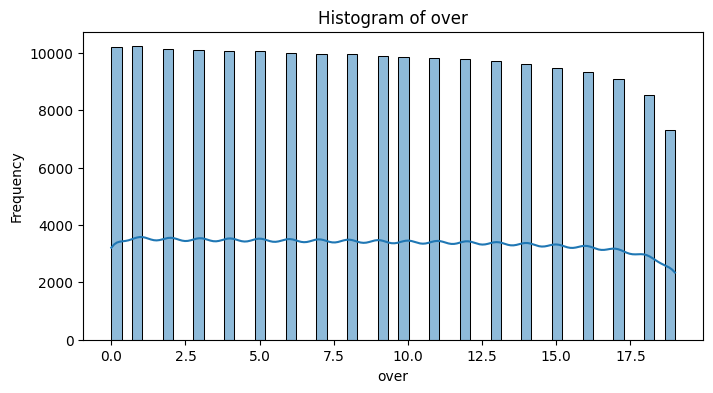

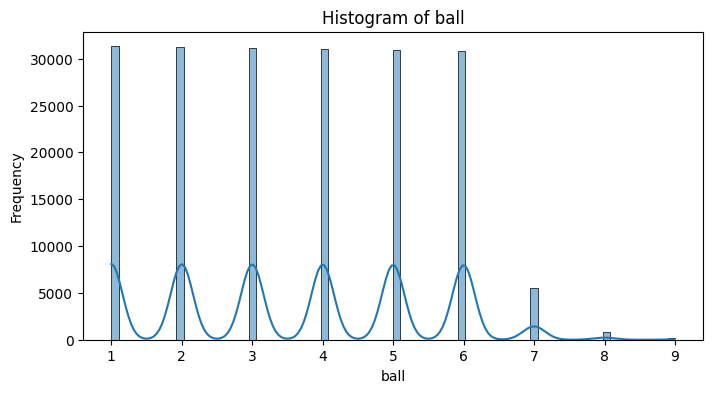

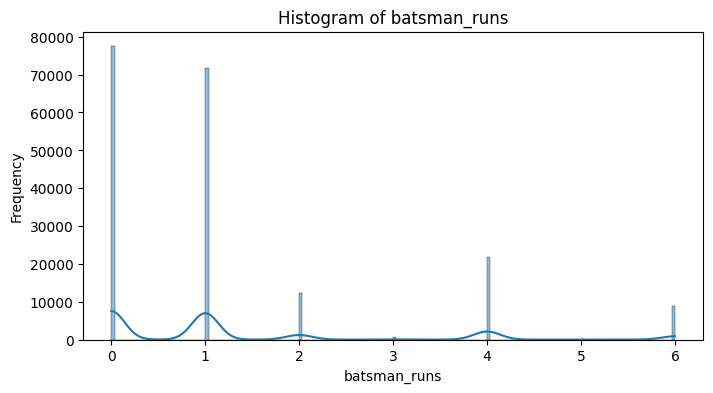

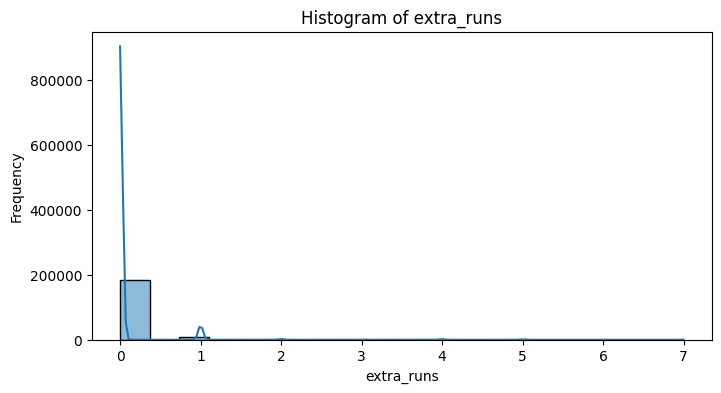

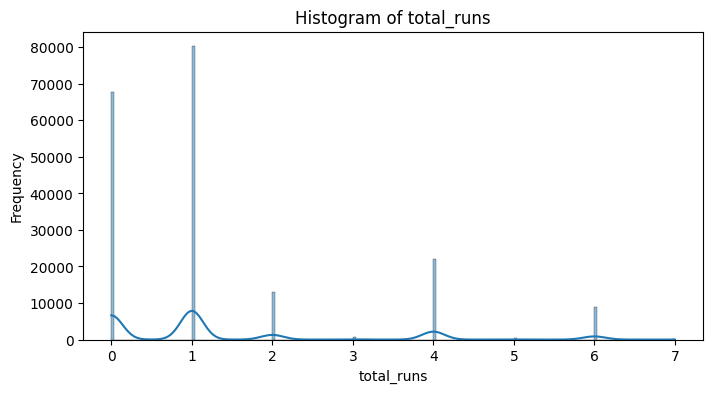

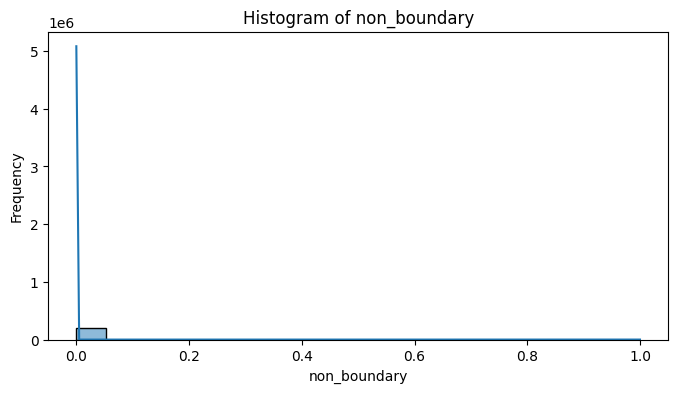

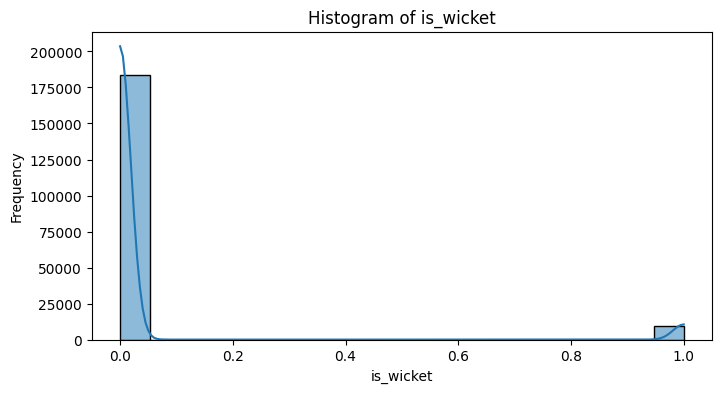

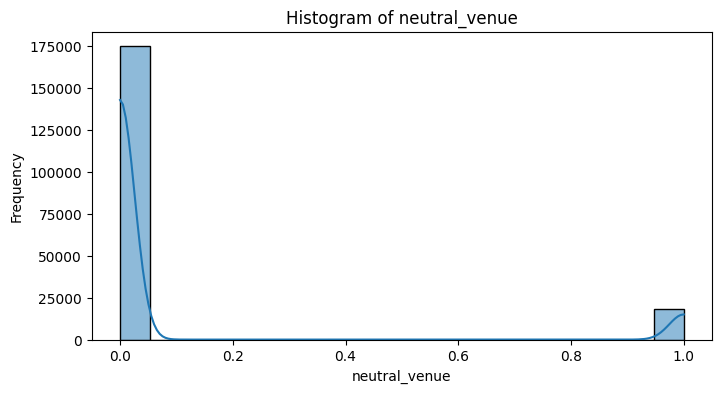

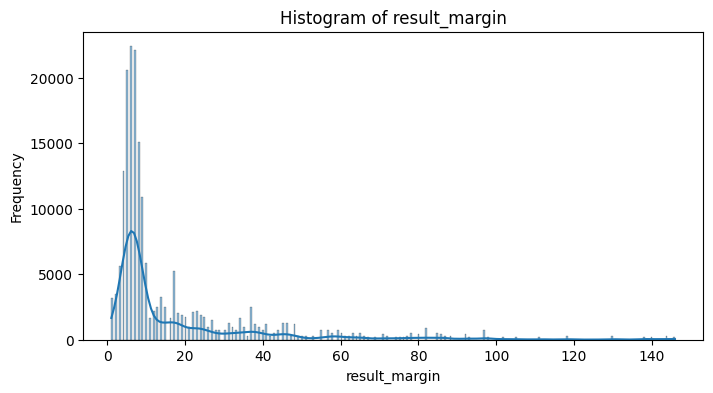

In [29]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting histograms for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The distribution of values of the result margin in the dataset. It shows how frequently each value or range of values occurs within the dataset.

It also shows that the Result margi wins of majority games happened between 0 and 20.

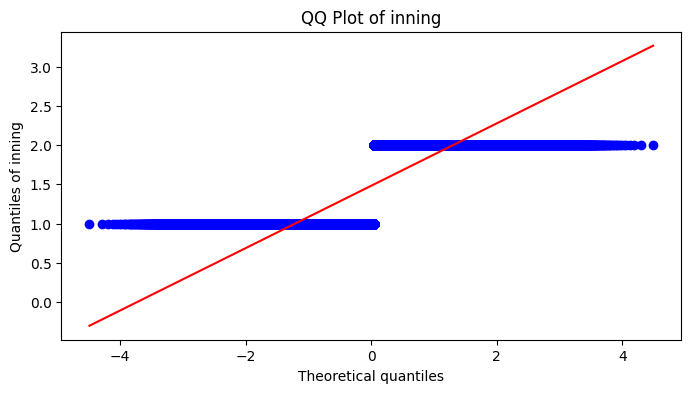

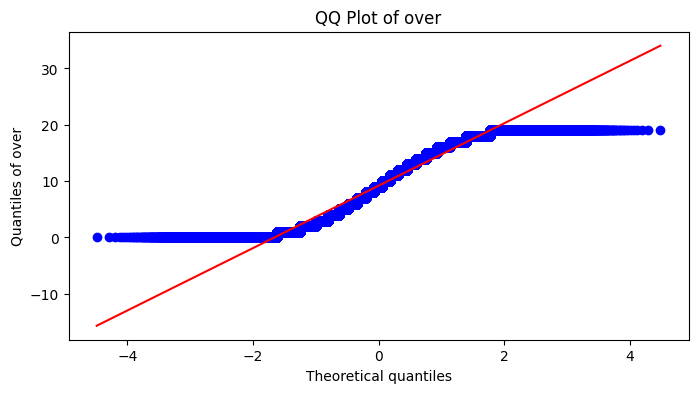

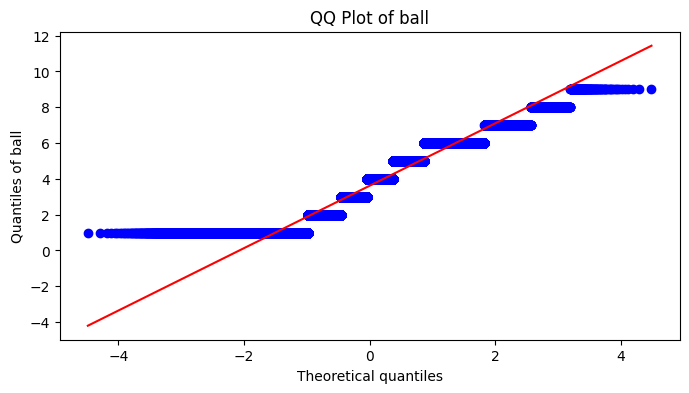

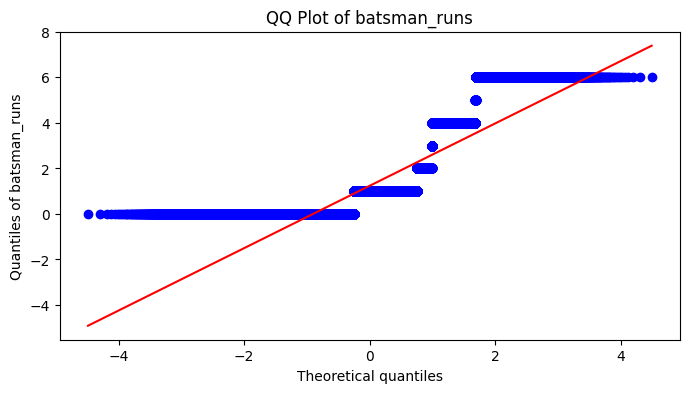

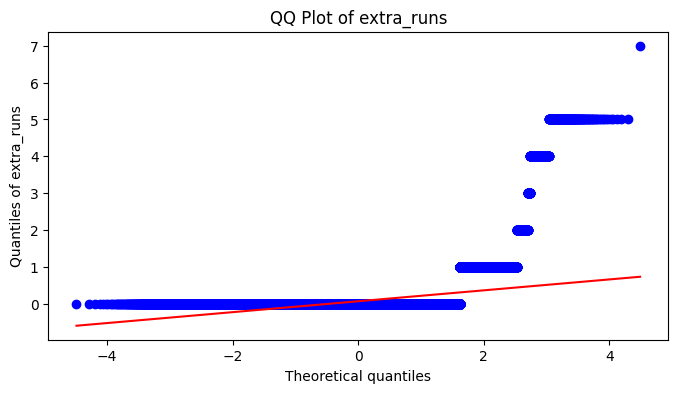

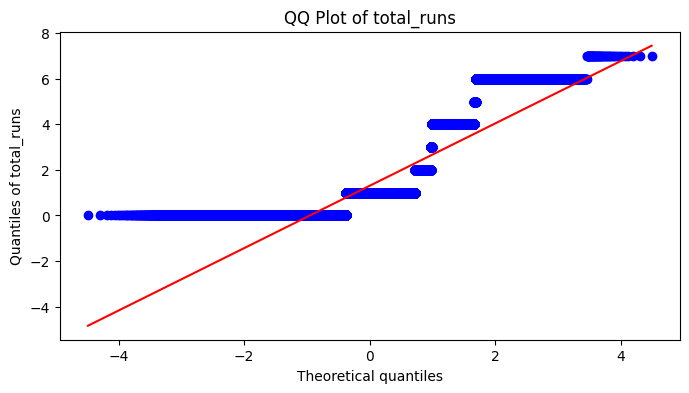

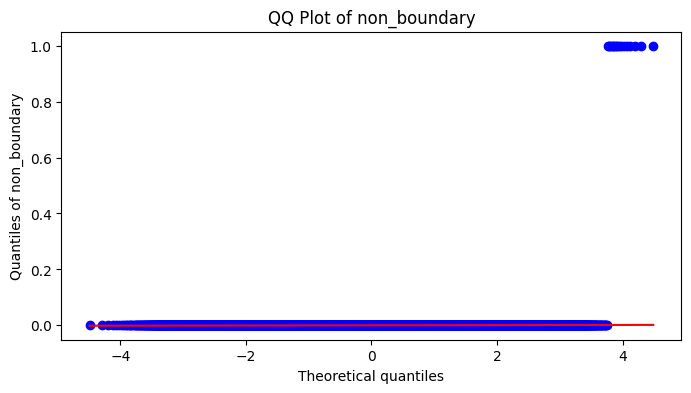

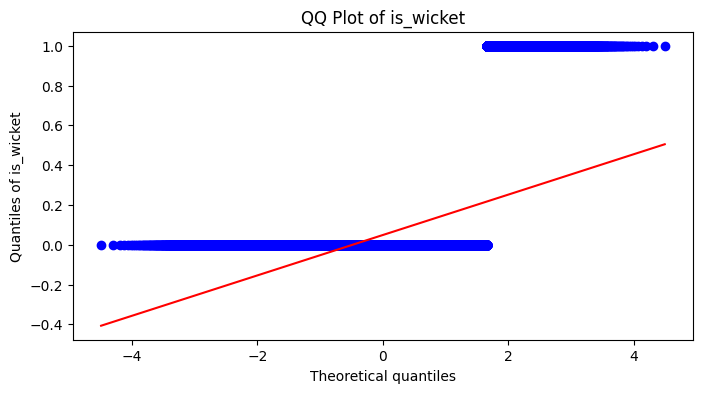

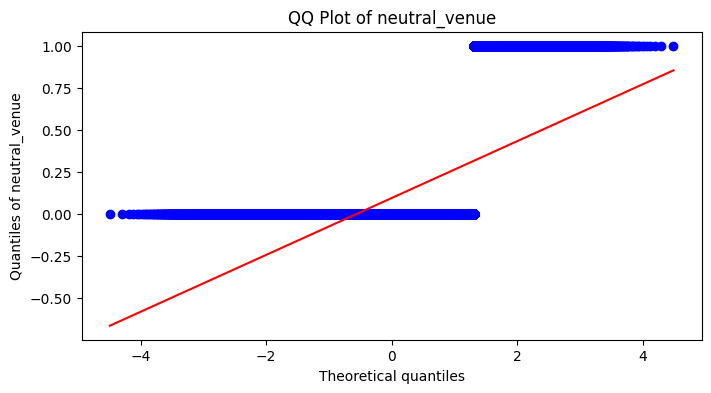

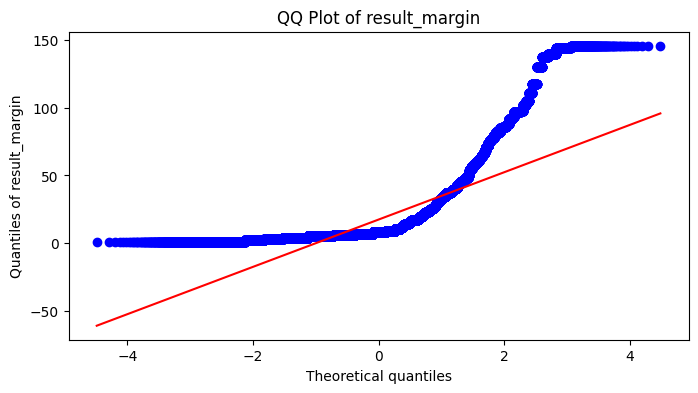

In [155]:
import scipy.stats as stats

numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting QQ plots for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    stats.probplot(numeric_data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.ylabel('Quantiles of ' + column)
    plt.show()

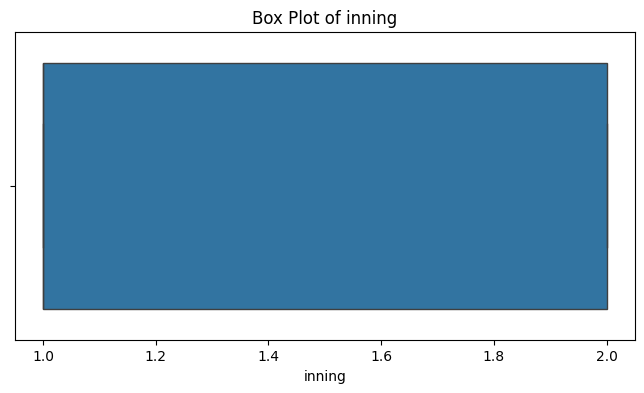

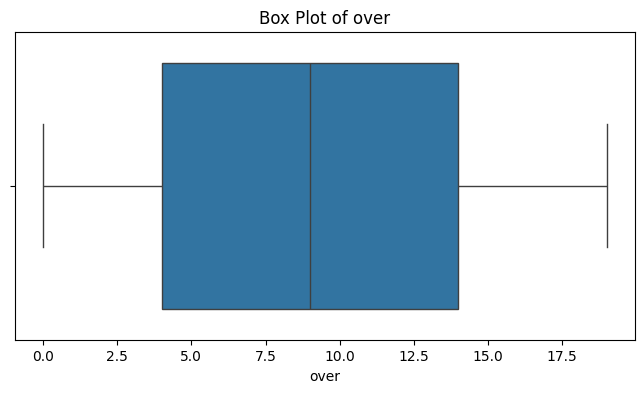

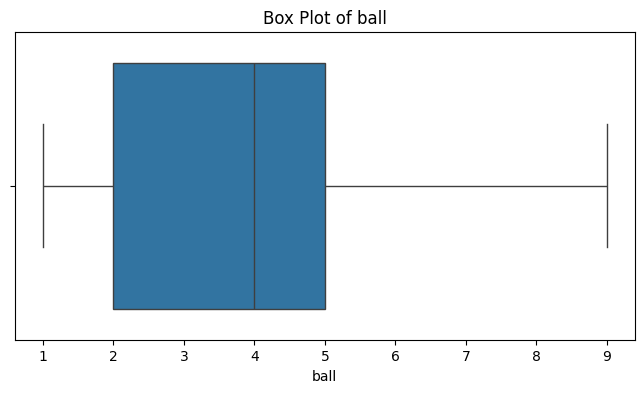

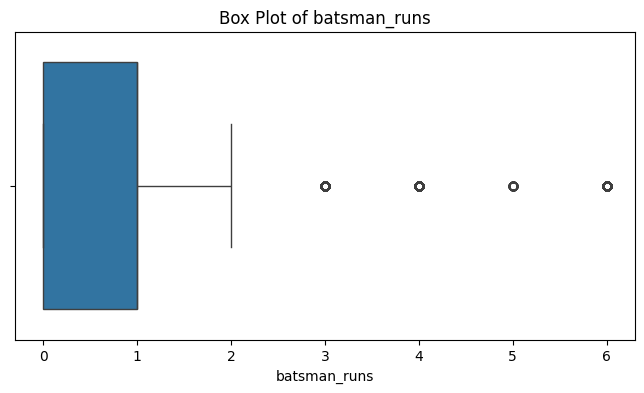

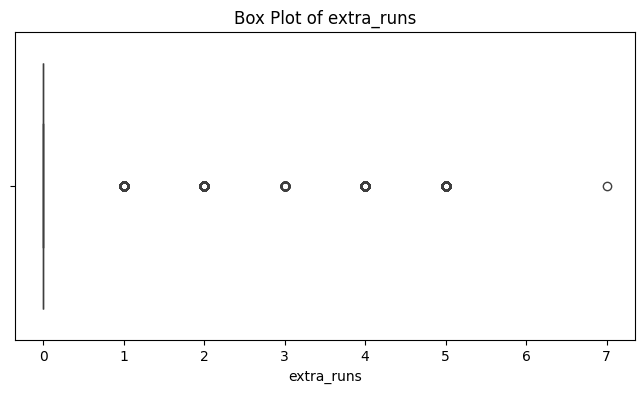

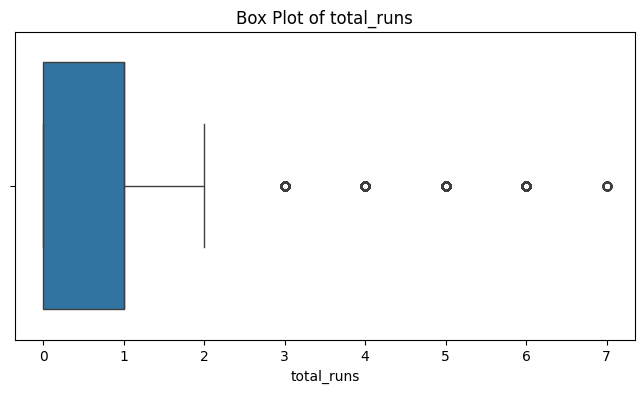

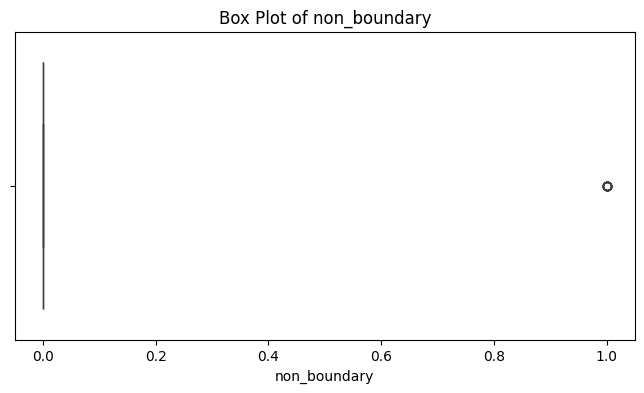

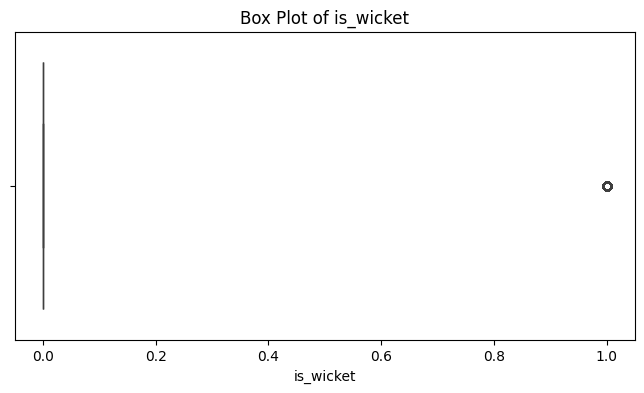

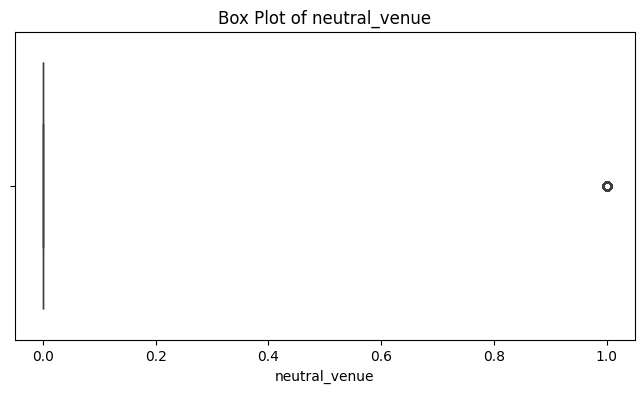

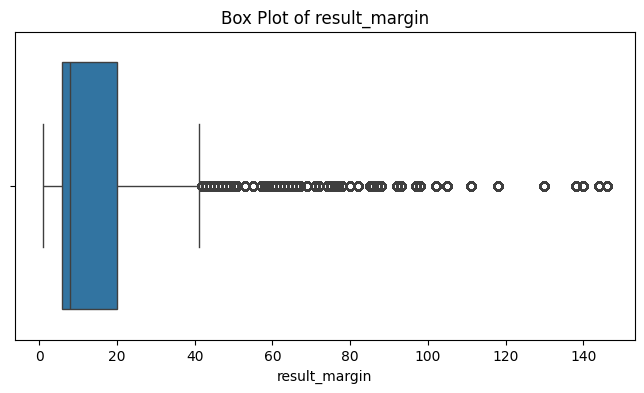

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plotting box plots for each numeric variable
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numeric_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


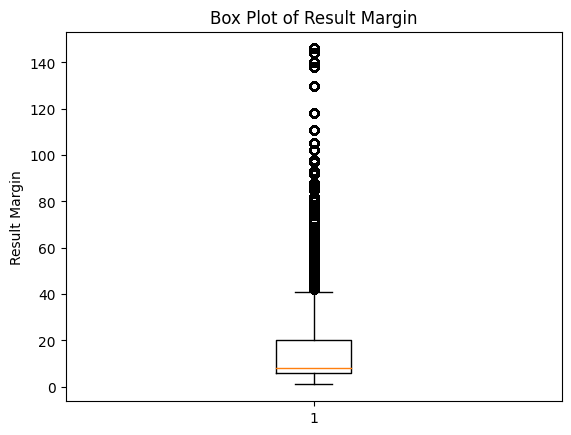

In [32]:
# Box Plot
plt.boxplot(numeric_data['result_margin'])
plt.ylabel('Result Margin')
plt.title('Box Plot of Result Margin')
plt.show()

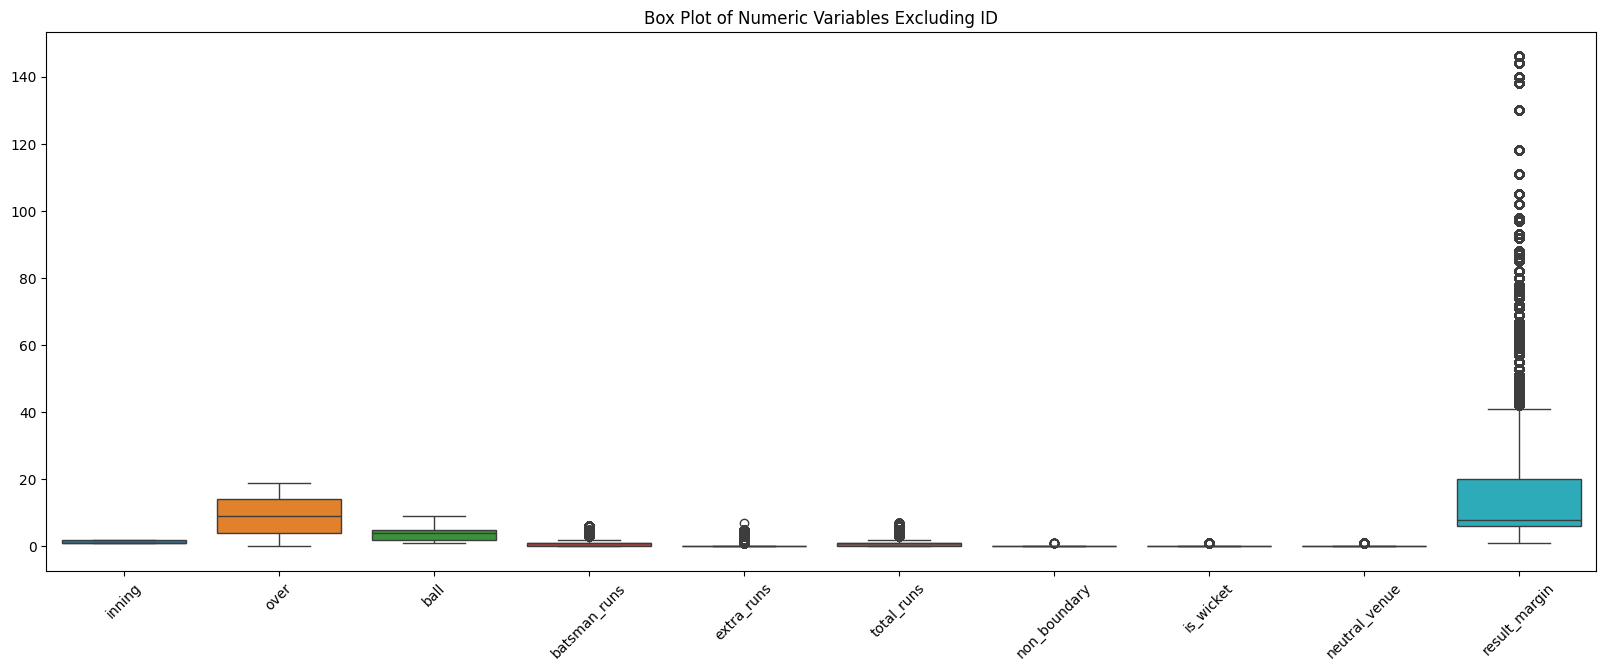

In [33]:
plt.figure(figsize=(20, 7))
sns.boxplot(numeric_data)
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.title('Box Plot of Numeric Variables Excluding ID')
plt.show()

# Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

To Predict the Target,
- Over
- Ball
- Run_on_this_ball
- is_wicket



Using Methods
1. Correlation Matrix
2. Random Forest Regressor
3. Univariate Feature selection

In [34]:
data.columns

Index(['inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'batting_team', 'bowling_team', 'city', 'date', 'player_of_match',
       'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'eliminator',
       'umpire1', 'umpire2'],
      dtype='object')

mapping the teams to numbers to predict

In [35]:
new_dataset.describe()

inning           over           ball   batsman_runs  \
count  193096.000000  193096.000000  193096.000000  193096.000000   
mean        1.482920       9.180361       3.615973       1.239948   
std         0.499709       5.676054       1.807097       1.610550   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       4.000000       2.000000       0.000000   
50%         1.000000       9.000000       4.000000       1.000000   
75%         2.000000      14.000000       5.000000       1.000000   
max         2.000000      19.000000       9.000000       6.000000   

          extra_runs     total_runs   non_boundary      is_wicket  \
count  193096.000000  193096.000000  193096.000000  193096.000000   
mean        0.066376       1.306324       0.000083       0.049053   
std         0.340004       1.598526       0.009102       0.215980   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         7.000000       7.000000       1.000000       1.000000   

       neutral_venue  result_margin  
count  193096.000000  193096.000000  
mean        0.095010      17.340895  
std         0.293229      21.702858  
min         0.000000       1.000000  
25%         0.000000       6.000000  
50%         0.000000       8.000000  
75%         0.000000      20.000000  
max         1.000000     146.000000

In [36]:
new_dataset.corr()

<ipython-input-36-a491ed2114aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_dataset.corr()


inning      over      ball  batsman_runs  extra_runs  \
inning         1.000000 -0.046767 -0.003834     -0.007195   -0.000445   
over          -0.046767  1.000000 -0.006946      0.087049   -0.001250   
ball          -0.003834 -0.006946  1.000000      0.007454   -0.002477   
batsman_runs  -0.007195  0.087049  0.007454      1.000000   -0.140787   
extra_runs    -0.000445 -0.001250 -0.002477     -0.140787    1.000000   
total_runs    -0.007344  0.087438  0.006983      0.977577    0.070853   
non_boundary   0.001450 -0.001191 -0.002158      0.019840   -0.001777   
is_wicket     -0.000874  0.073985  0.004438     -0.170005   -0.041377   
neutral_venue  0.000613 -0.001475  0.000756     -0.021078    0.004169   
result_margin -0.002796 -0.000859  0.001631      0.003110    0.004112   

               total_runs  non_boundary  is_wicket  neutral_venue  \
inning          -0.007344      0.001450  -0.000874       0.000613   
over             0.087438     -0.001191   0.073985      -0.001475   
ball             0.006983     -0.002158   0.004438       0.000756   
batsman_runs     0.977577      0.019840  -0.170005      -0.021078   
extra_runs       0.070853     -0.001777  -0.041377       0.004169   
total_runs       1.000000      0.019611  -0.180084      -0.020349   
non_boundary     0.019611      1.000000  -0.002068      -0.001009   
is_wicket       -0.180084     -0.002068   1.000000       0.002704   
neutral_venue   -0.020349     -0.001009   0.002704       1.000000   
result_margin    0.004008      0.002085   0.018926      -0.011012   

               result_margin  
inning             -0.002796  
over               -0.000859  
ball                0.001631  
batsman_runs        0.003110  
extra_runs          0.004112  
total_runs          0.004008  
non_boundary        0.002085  
is_wicket           0.018926  
neutral_venue      -0.011012  
result_margin       1.000000

**METHOD 1- Correlation** **Matrix**

<ipython-input-37-51c8fbe34be3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numeric_data.corr()


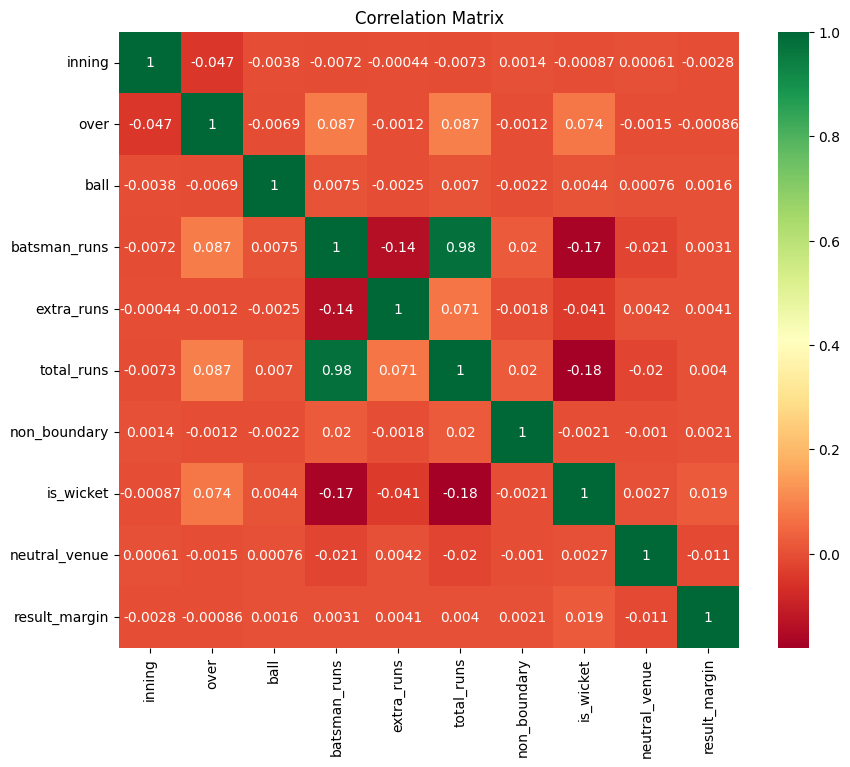

In [37]:
numeric_data = pd.DataFrame(new_dataset)

# Display the correlation matrix using Seaborn's heatmap
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title('Correlation Matrix')
plt.show()

checking values which are weakely correlated


In [38]:
correlations = numeric_data.corr()['result_margin'].abs().sort_values(ascending=False)
print(correlations)

result_margin    1.000000
is_wicket        0.018926
neutral_venue    0.011012
extra_runs       0.004112
total_runs       0.004008
batsman_runs     0.003110
inning           0.002796
non_boundary     0.002085
ball             0.001631
over             0.000859
Name: result_margin, dtype: float64


<ipython-input-38-9601fff38358>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = numeric_data.corr()['result_margin'].abs().sort_values(ascending=False)


**Method 2 - RANDOM FOREST REGRESSOR**

In [131]:
feature_columns = [ 'over','ball','extra_runs', 'is_wicket', 'total_runs']

In [40]:
from sklearn.ensemble import RandomForestRegressor
# Prepare your features (X) and target (y)
X = numeric_data[feature_columns]  # Replace with your actual feature columns
y = numeric_data['result_margin']     # Assuming 'total_runs' is your target variable

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


over          0.425947
ball          0.317126
total_runs    0.160938
extra_runs    0.078257
is_wicket     0.017733
dtype: float64


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare your features (X) and target (y)
X = numeric_data[feature_columns]  # Replace with your actual feature columns
y = numeric_data['result_margin']     # 'total_runs' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the performance metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)


RMSE: 21.99642643169645
over          0.423421
ball          0.323775
total_runs    0.154412
extra_runs    0.078072
is_wicket     0.020320
dtype: float64


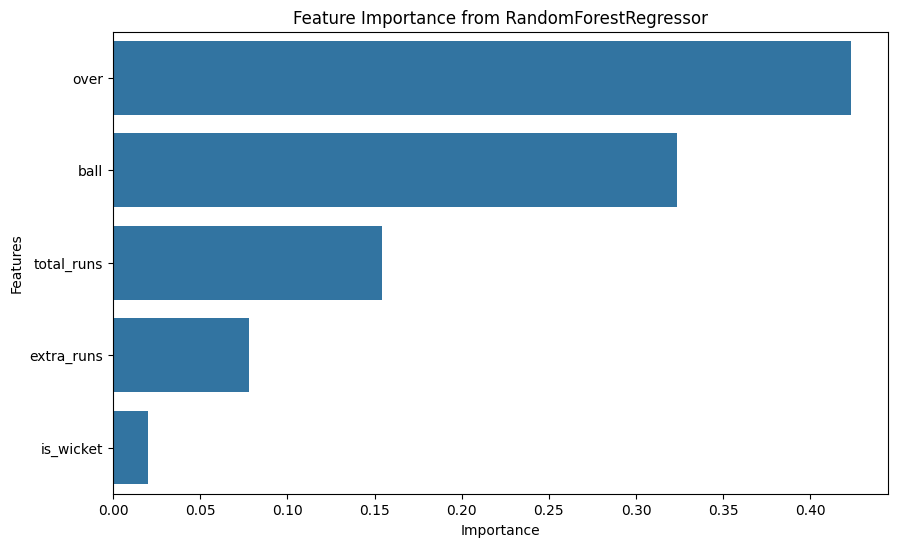

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance' is the Series you obtained from the RandomForestRegressor
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()


**Method 3 - F TEST Feature**

In [43]:

from sklearn.feature_selection import f_regression, SelectKBest

# Select the top k features based on F-test
selector = SelectKBest(f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Get selected features and their scores
selected_features = X.columns[selector.get_support()]
scores = selector.scores_
print(pd.DataFrame({'Feature': selected_features, 'Score': scores}).sort_values(by='Score', ascending=False))

      Feature      Score
3   is_wicket  69.186300
2  extra_runs   3.264902
4  total_runs   3.101799
1        ball   0.513810
0        over   0.142644


is_wicket: This feature has the highest score of 69.186300, indicating that it is the most important feature in predicting the target variable. In the context of IPL, "is_wicket" could possibly refer to whether a wicket was taken during a particular event or over.

extra_runs: This feature has a score of 3.264902, indicating moderate importance in predicting the target variable. "extra_runs" likely refers to the number of extra runs scored, such as wides or no-balls.

total_runs: This feature has a score of 3.101799, similar to "extra_runs," indicating moderate importance. "total_runs" typically represents the total number of runs scored in a particular event or over.

ball: This feature has a score of 0.513810, indicating lower importance compared to the previous features but still contributing to the model's predictions. "ball" could refer to the number of balls bowled in a particular event or over.

over: This feature has the lowest score of 0.142644, suggesting it has the least importance among the features considered. "over" likely represents the over number in a cricket match.

In summary, based on this analysis, "is_wicket" appears to be the most influential feature in predicting the target variable, followed by "extra_runs" and "total_runs," while "over" is the least influential. These insights can help you understand which features are most relevant for predicting outcomes in IPL matches and potentially guide further analysis or model refinement.

# Q5.Which independent variables have missing data? How much?

None



In [44]:

import statsmodels.api as sm

targets = ['result_margin']


for i in targets:
    model = sm.OLS(numeric_data[i], numeric_data[feature_columns]).fit()
    print(f"Model Summary for {i}:")
    print(model.summary())
    print("\n\n")


Model Summary for result_margin:
                                 OLS Regression Results                                
Dep. Variable:          result_margin   R-squared (uncentered):                   0.343
Model:                            OLS   Adj. R-squared (uncentered):              0.343
Method:                 Least Squares   F-statistic:                          2.020e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        00:31:43   Log-Likelihood:                     -8.7528e+05
No. Observations:              193096   AIC:                                  1.751e+06
Df Residuals:                  193091   BIC:                                  1.751e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

In [45]:
# List of columns to check for missing values
columns_to_check = feature_columns

# Loop through the columns and print missing value counts
for column in columns_to_check:
    missing_count = merged_data[column].isnull().sum()
    print(f"Missing values in '{column}': {missing_count}")


Missing values in 'over': 0
Missing values in 'ball': 0
Missing values in 'extra_runs': 0
Missing values in 'is_wicket': 0
Missing values in 'total_runs': 0



# Q6. Do the training and test sets have the same data?


In [46]:
from sklearn.model_selection import train_test_split

X = new_dataset[
    [ 'over','ball','extra_runs', 'is_wicket', 'total_runs']
]

y = new_dataset["result_margin"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)


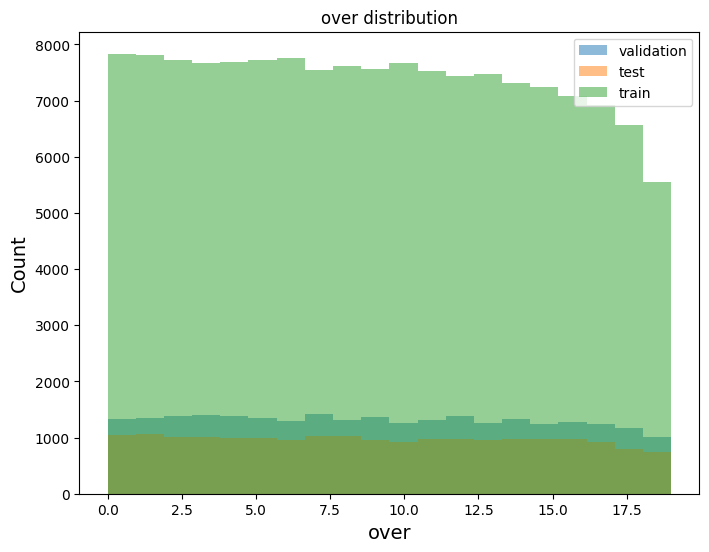

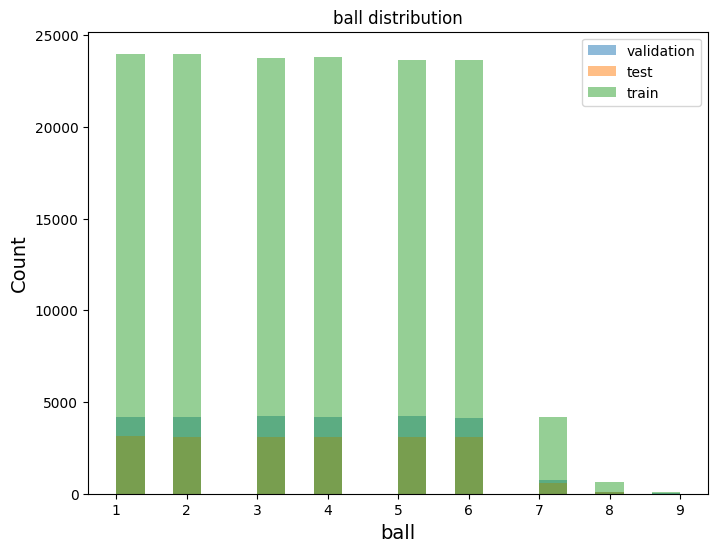

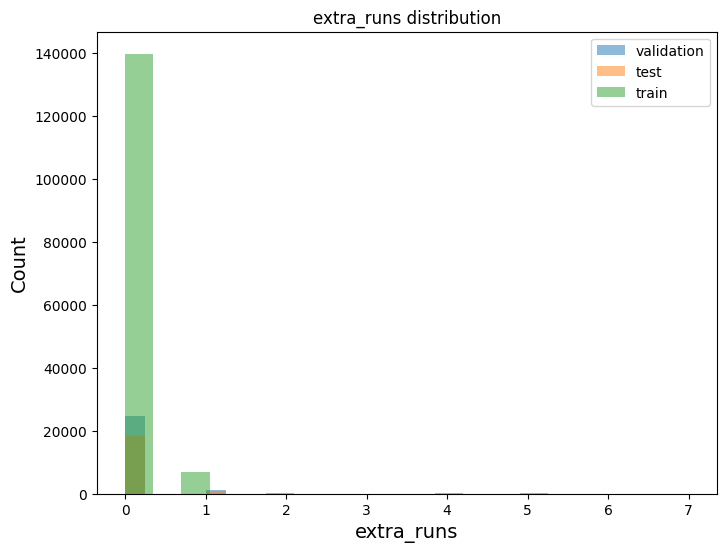

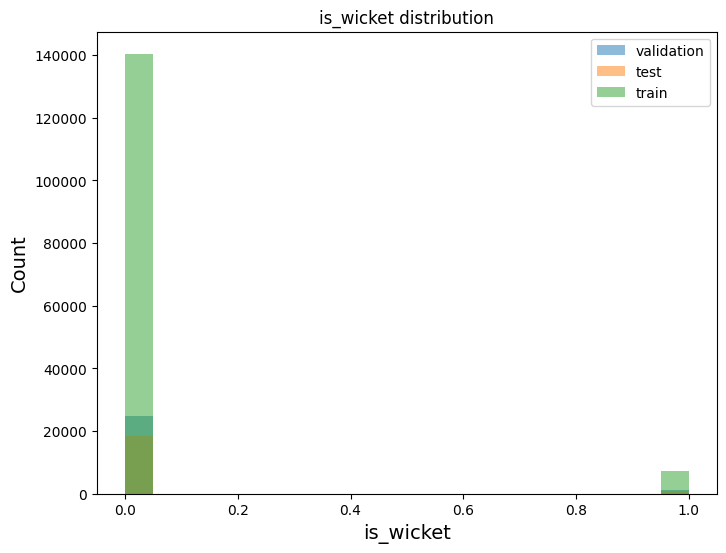

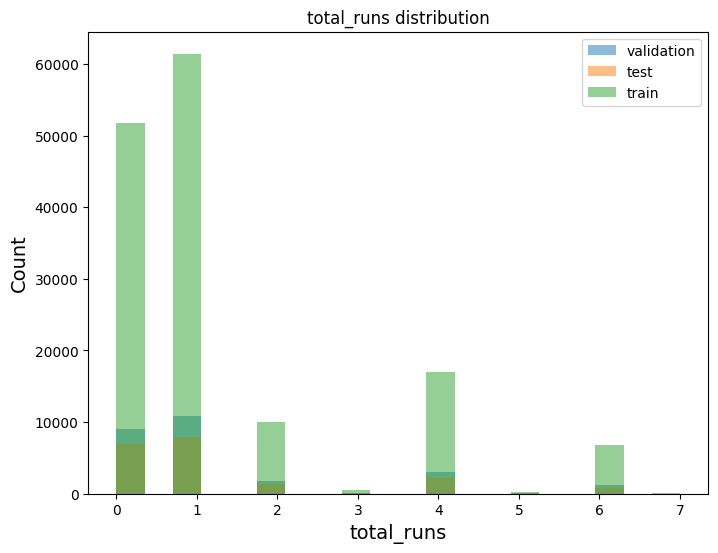

In [47]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    ['over','ball','extra_runs', 'is_wicket', 'total_runs'
    ]
]

X_val_plot = X_val[
    [
        'over','ball','extra_runs', 'is_wicket', 'total_runs'
    ]
]

X_train_plot = X_train[
    [
      'over','ball','extra_runs', 'is_wicket', 'total_runs'
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

# Q7. Is the predictor variables independent of all the other predictor variables?


<ipython-input-48-c9e0d4fb261a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


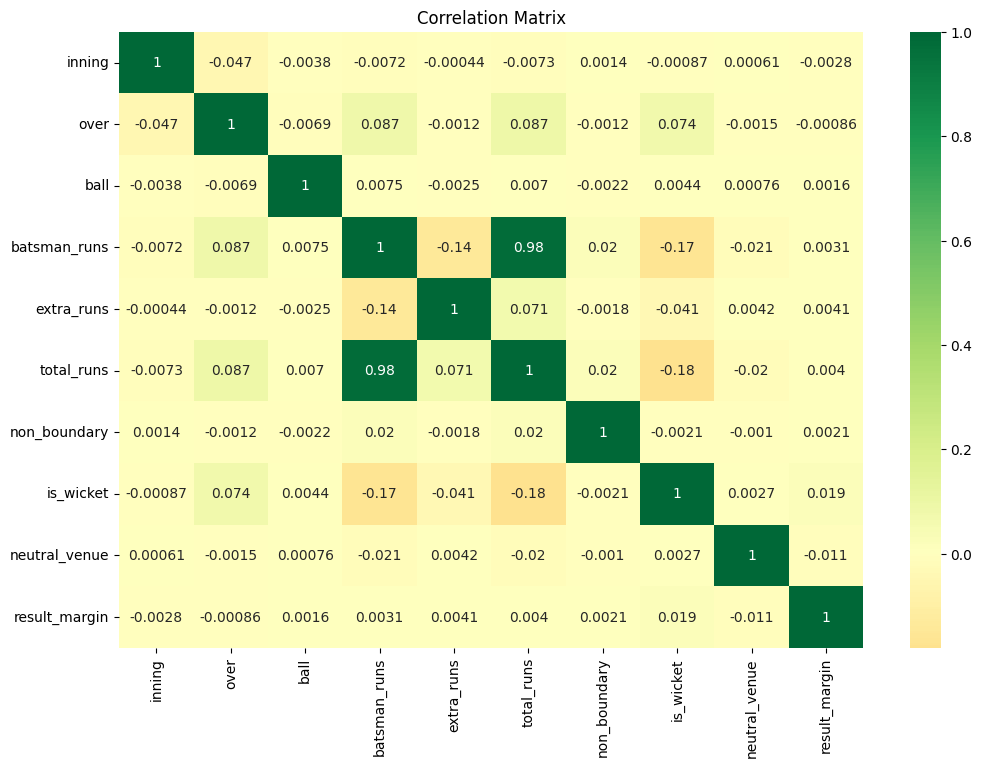

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
X = new_dataset
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", center=0)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-49-239a5902b71a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

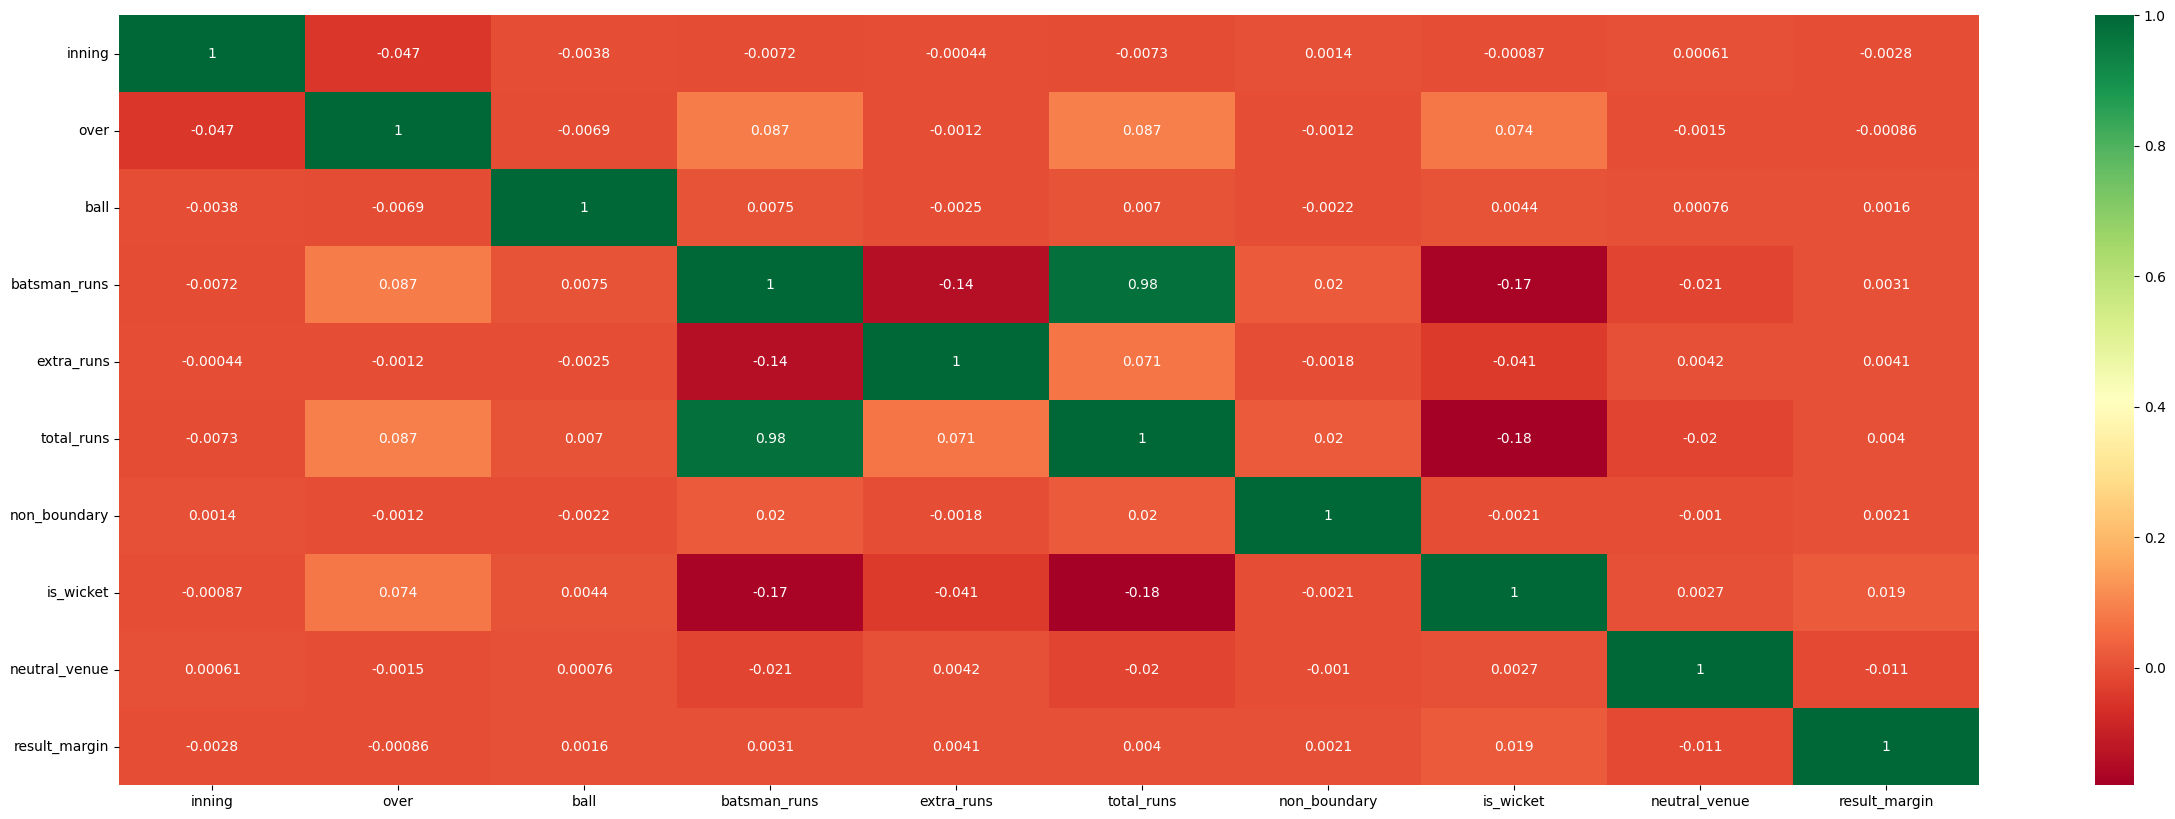

In [49]:
plt.figure(figsize=(30, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap="RdYlGn")

Most data variables show very low correlation values with each other, close to zero, which suggests there is no strong linear relationship between them.

This indicates that the predictors are largely independent.

* There is a moderate positive correlation (0.16) between id and Target. However, this is likely not a meaningful relationship, as id is typically a unique identifier for the observations and should not have a predictive relationship with other variables.

* The variable is_wicket has a slight negative correlation with Run_on_this_ball (-0.18), which may indicate that when a wicket falls, fewer runs are scored on that ball, which aligns with the nature of the game.


# Q8 Which predictor variables are the most important?
* Total_runs

# Q9. Do the ranges of the predictor variables make sense?
* Yes as expected the Total Runs are a component of Result Margin a.k.a the margin in which the match was won.


# Q10. What are the distributions of the predictor variables?

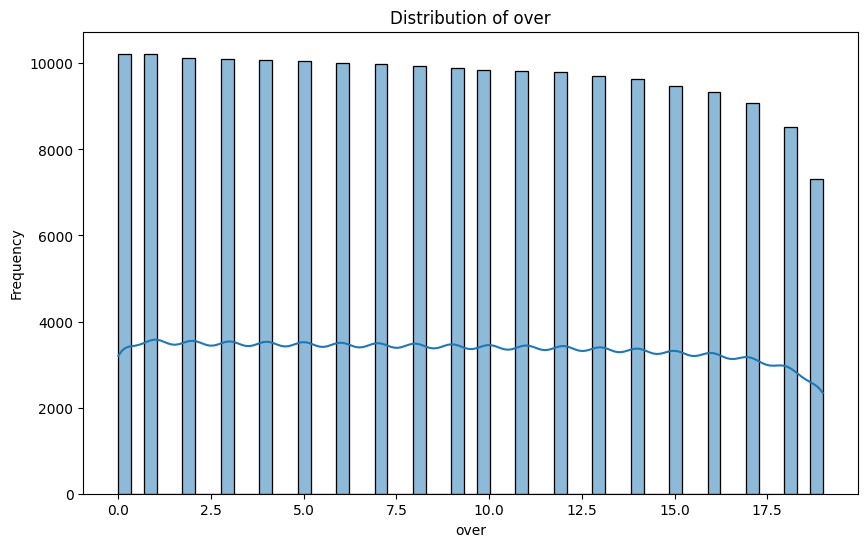

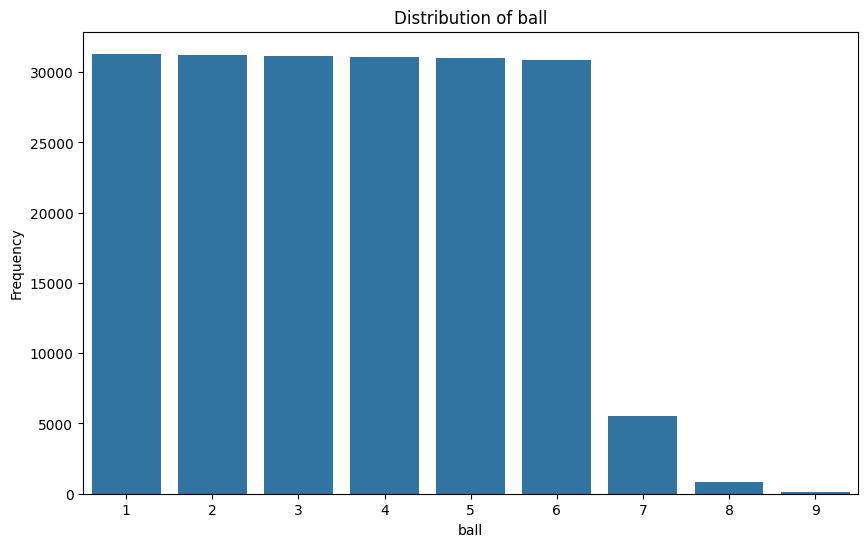

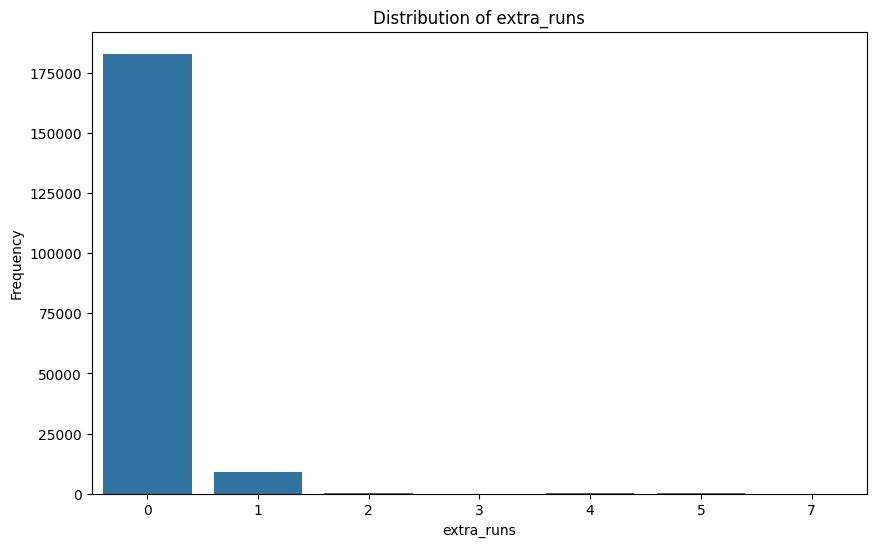

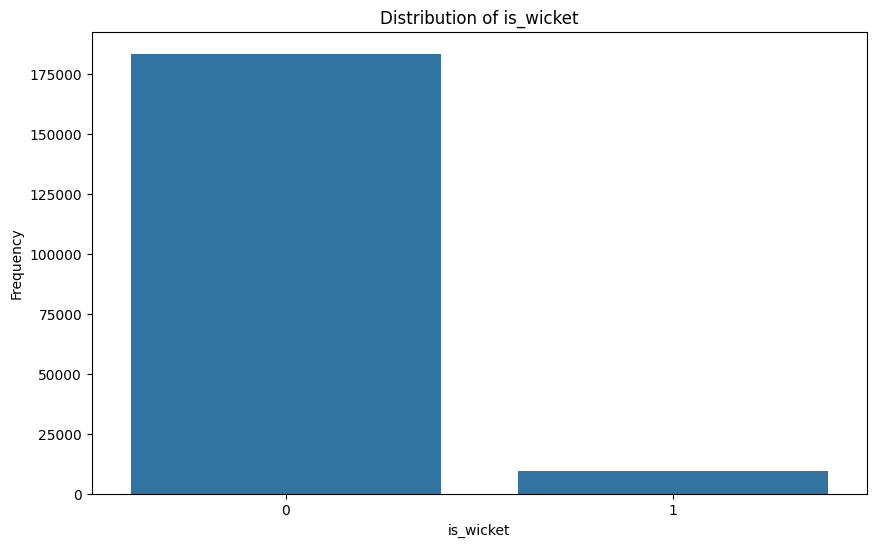

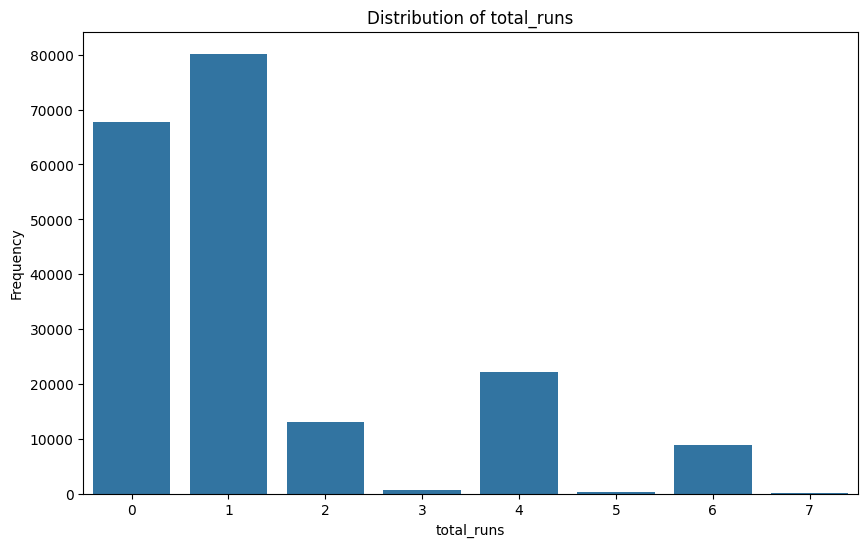

In [50]:
# predictors = ['over', 'ball', 'total', 'is_wicket']

for predictor in feature_columns:
    plt.figure(figsize=(10, 6))
    # If the variable is continuous, use a histogram with a KDE
    if new_dataset[predictor].nunique() > 10:  # Arbitrary cutoff for determining if the variable is continuous
        sns.histplot(new_dataset[predictor], kde=True)
    # If the variable is categorical or discrete, use a count plot
    else:
        sns.countplot(x=new_dataset[predictor])
    plt.title(f'Distribution of {predictor}')
    plt.ylabel('Frequency')
    plt.xlabel(predictor)
    plt.show()


* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix

In [51]:
# Removing outliers

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

predictor_variables = feature_columns
# Split the dataset into predictor variables (X) and target variable (y)
X = data[predictor_variables]
y = data["result_margin"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model without removing outliers
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred)

# Train a linear regression model after removing outliers
# Define a function to remove outliers based on z-scores
def remove_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return data[(z_scores.abs() < threshold).all(axis=1)]

# Remove outliers from the training set
X_train_no_outliers = remove_outliers_zscore(X_train)
y_train_no_outliers = y_train[X_train.index.isin(X_train_no_outliers.index)]

# Train the model without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predict on the test set after removing outliers
y_pred_no_outliers = model_no_outliers.predict(X_test)
mse_without_outliers = mean_squared_error(y_test, y_pred_no_outliers)

print("Mean Squared Error with outliers:", mse_with_outliers)
print("Mean Squared Error without outliers:", mse_without_outliers)

Mean Squared Error with outliers: 478.31072433983695
Mean Squared Error without outliers: 478.35499334652314


The Mean Squared Error (MSE) before and after removing outliers is very close in value, which suggests that outliers did not significantly affect the predictions of your linear regression model for this particular dataset.

In [52]:
import numpy as np
import pandas as pd

# Function to randomly introduce missing values
def introduce_missingness(new_dataset, column, percent):
    new_dataset = new_dataset.copy()
    np.random.seed(0)
    mask = np.random.rand(len(new_dataset)) < percent
    new_dataset.loc[mask, column] = np.nan
    return new_dataset

# Introduce 1%, 5%, and 10% missingness
data_1p_missing = introduce_missingness(new_dataset, 'total_runs', 0.01)
data_5p_missing = introduce_missingness(new_dataset, 'total_runs', 0.05)
data_10p_missing = introduce_missingness(new_dataset, 'total_runs', 0.10)


In [53]:
from sklearn.impute import SimpleImputer, KNNImputer

# Function to perform imputation
def impute_data(method, new_dataset, column):
    imputer = SimpleImputer(strategy=method) if method in ['mean', 'median'] else KNNImputer(n_neighbors=5)
    data_imputed = new_dataset.copy()
    data_imputed[column] = imputer.fit_transform(new_dataset[[column]])
    return data_imputed

# Impute the data with missingness
mean_imputed_data = impute_data('mean', data_1p_missing, 'total_runs')
median_imputed_data = impute_data('median', data_1p_missing, 'total_runs')
knn_imputed_data = impute_data('knn', data_1p_missing, 'total_runs')


In [54]:
from sklearn.metrics import mean_absolute_error

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data, column):
    mask = original_data[column].isna()
    mae = mean_absolute_error(new_dataset.loc[mask, column], imputed_data.loc[mask, column])
    return mae

# Evaluate each imputation
mae_mean = evaluate_imputation(data_1p_missing, mean_imputed_data, 'total_runs')
mae_median = evaluate_imputation(data_1p_missing, median_imputed_data, 'total_runs')
mae_knn = evaluate_imputation(data_1p_missing, knn_imputed_data, 'total_runs')

print(f'MAE for Mean Imputation: {mae_mean}')
print(f'MAE for Median Imputation: {mae_median}')
print(f'MAE for KNN Imputation: {mae_knn}')


MAE for Mean Imputation: 1.1366747487647995
MAE for Median Imputation: 0.970757180156658
MAE for KNN Imputation: 1.1366747487647995


Removing 5%

In [68]:
from sklearn.impute import SimpleImputer, KNNImputer

# Function to perform imputation
def impute_data(method, new_dataset, column):
    imputer = SimpleImputer(strategy=method) if method in ['mean', 'median'] else KNNImputer(n_neighbors=5)
    data_imputed = new_dataset.copy()
    data_imputed[column] = imputer.fit_transform(new_dataset[[column]])
    return data_imputed

# Impute the data with missingness
mean_imputed_data = impute_data('mean', data_5p_missing, 'total_runs')
median_imputed_data = impute_data('median', data_5p_missing, 'total_runs')
knn_imputed_data = impute_data('knn', data_5p_missing, 'total_runs')

from sklearn.metrics import mean_absolute_error

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data, column):
    mask = original_data[column].isna()
    mae = mean_absolute_error(new_dataset.loc[mask, column], imputed_data.loc[mask, column])
    return mae

# Evaluate each imputation
mae_mean = evaluate_imputation(data_5p_missing, mean_imputed_data, 'total_runs')
mae_median = evaluate_imputation(data_5p_missing, median_imputed_data, 'total_runs')
mae_knn = evaluate_imputation(data_5p_missing, knn_imputed_data, 'total_runs')

print(f'MAE for Mean Imputation: {mae_mean}')
print(f'MAE for Median Imputation: {mae_median}')
print(f'MAE for KNN Imputation: {mae_knn}')


MAE for Mean Imputation: 1.166434950755081
MAE for Median Imputation: 1.0032450539097666
MAE for KNN Imputation: 1.166434950755081


Removing 10%

In [60]:
from sklearn.impute import SimpleImputer, KNNImputer

# Function to perform imputation
def impute_data(method, new_dataset, column):
    imputer = SimpleImputer(strategy=method) if method in ['mean', 'median'] else KNNImputer(n_neighbors=5)
    data_imputed = new_dataset.copy()
    data_imputed[column] = imputer.fit_transform(new_dataset[[column]])
    return data_imputed

# Impute the data with missingness
mean_imputed_data = impute_data('mean', data_10p_missing, 'total_runs')
median_imputed_data = impute_data('median', data_10p_missing, 'total_runs')
knn_imputed_data = impute_data('knn', data_10p_missing, 'total_runs')

from sklearn.metrics import mean_absolute_error

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data, column):
    mask = original_data[column].isna()
    mae = mean_absolute_error(new_dataset.loc[mask, column], imputed_data.loc[mask, column])
    return mae

# Evaluate each imputation
mae_mean = evaluate_imputation(data_10p_missing, mean_imputed_data, 'total_runs')
mae_median = evaluate_imputation(data_10p_missing, median_imputed_data, 'total_runs')
mae_knn = evaluate_imputation(data_10p_missing, knn_imputed_data, 'total_runs')

print(f'MAE for Mean Imputation: {mae_mean}')
print(f'MAE for Median Imputation: {mae_median}')
print(f'MAE for KNN Imputation: {mae_knn}')


MAE for Mean Imputation: 1.164335699971189
MAE for Median Imputation: 1.0006713835665961
MAE for KNN Imputation: 1.164335699971189


In [53]:

pip install fancyimpute


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from fancyimpute import KNN, IterativeImputer
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate missing values in X_train
np.random.seed(42)
missing_percentage = [0.01, 0.05, 0.1]

for percentage in missing_percentage:
    missing_mask_train = np.random.rand(*X_train.shape) < percentage
    X_train_missing = X_train.copy()
    # Convert the dataframe to a numeric type
    X_train_missing = X_train_missing.apply(pd.to_numeric, errors='ignore')

    # Drop any rows that contain non-numeric values
    X_train_missing = X_train_missing.dropna()

    X_train_missing[missing_mask_train] = np.nan

    print(f"Missing Percentage: {percentage * 100}%")

    # Method 1: Simple Imputation (mean)
    imputer = SimpleImputer(strategy='mean')
    X_train_simple_imputed = imputer.fit_transform(X_train_missing)

    # Method 2: k-Nearest Neighbors Imputation
    X_train_knn_imputed = KNN(k=5).fit_transform(X_train_missing)

    # Method 3: Iterative Imputation
    X_train_iterative_imputed = IterativeImputer(random_state=42).fit_transform(X_train_missing)

    # Applying the same missing mask to the test set
    missing_mask_test = np.random.rand(*X_test.shape) < percentage
    X_test_missing = X_test.copy()
    X_test_missing[missing_mask_test] = np.nan

    # Printing imputation method and check accuracy on the test set
    imputation_methods = ['Simple Imputation', 'k-NN Imputation', 'Iterative Imputation']
    imputed_datasets = [
        X_train_simple_imputed, X_train_knn_imputed, X_train_iterative_imputed
    ]

    for method, imputed_data in zip(imputation_methods, imputed_datasets):
        # Classification problem
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(imputed_data, y_train)

        # Impute missing values on the test set using the same method
        if method == 'Simple Imputation':
            X_test_imputed = imputer.transform(X_test_missing)
        elif method == 'k-NN Imputation':
            X_test_imputed = KNN(k=5).fit_transform(X_test_missing)
        elif method == 'Iterative Imputation':
            X_test_imputed = IterativeImputer(random_state=42).fit_transform(X_test_missing)

        y_pred = clf.predict(X_test_imputed)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"{method} - Accuracy on Test Set: {accuracy:.4f}")
        print(f"{method} - Confusion Matrix:")
        print(cm)
        print("\n")


Missing Percentage: 1.0%


Thank you.

In [55]:
new_dataset.describe()

inning           over           ball   batsman_runs  \
count  193096.000000  193096.000000  193096.000000  193096.000000   
mean        1.482920       9.180361       3.615973       1.239948   
std         0.499709       5.676054       1.807097       1.610550   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       4.000000       2.000000       0.000000   
50%         1.000000       9.000000       4.000000       1.000000   
75%         2.000000      14.000000       5.000000       1.000000   
max         2.000000      19.000000       9.000000       6.000000   

          extra_runs     total_runs   non_boundary      is_wicket  \
count  193096.000000  193096.000000  193096.000000  193096.000000   
mean        0.066376       1.306324       0.000083       0.049053   
std         0.340004       1.598526       0.009102       0.215980   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         7.000000       7.000000       1.000000       1.000000   

       neutral_venue  result_margin  
count  193096.000000  193096.000000  
mean        0.095010      17.340895  
std         0.293229      21.702858  
min         0.000000       1.000000  
25%         0.000000       6.000000  
50%         0.000000       8.000000  
75%         0.000000      20.000000  
max         1.000000     146.000000

In [56]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.6 MB/s eta 0:00:00


In [57]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
6
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

6
Checking whether there is an H2O instance running at http://localhost:16907..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_220wr65
  JVM stdout: /tmp/tmp_220wr65/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_220wr65/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:16907
Connecting to H2O server at http://127.0.0.1:16907 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_hjj38q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:16907
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [87]:
df = h2o.H2OFrame(new_dataset)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [88]:
df.describe(chunk_summary=True)

Rows:193096
Cols:28

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C0L           Constant long              18       4.59184             1.4 KB    0.0228816
CBS           Binary                     16       4.08163             28.2 KB   0.458141
CXI           Sparse Integers            50       12.7551             69.9 KB   1.13683
C1N           1-Byte Integers (w/o NAs)  242      61.7347             3.2 MB    53.3148
C2            2-Byte Integers            42       10.7143             1.1 MB    18.4552
C2S           2-Byte Fractions           2        0.510204            48.2 KB   0.784998
C8            8-byte Integers            12       3.06122             1.3 MB    21.43
CUD           Unique Reals               10       2.55102             270.2 KB  4.39711

Frame distribution summary: 
                 size    number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  ------  ----------------  -----------------------------  ------------------
127.0.0.1:16907  6.0 MB  193096            14                             392
mean             6.0 MB  193096            14                             392
min              6.0 MB  193096            14                             392
max              6.0 MB  193096            14                             392
stddev           0  B    0                 0                              0
total            6.0 MB  193096            14                             392

inning              over               ball                batsman      non_striker    bowler     batsman_runs        extra_runs           total_runs          non_boundary          is_wicket            batting_team           bowling_team                 city       date                 player_of_match    venue                  neutral_venue        team1                        team2                  toss_winner                  toss_decision    winner                 result    result_margin       eliminator    umpire1    umpire2
-------  ------------------  -----------------  ------------------  -----------  -------------  ---------  ------------------  -------------------  ------------------  --------------------  -------------------  ---------------------  ---------------------------  ---------  -------------------  -----------------  ---------------------  -------------------  ---------------------------  ---------------------  ---------------------------  ---------------  ---------------------  --------  ------------------  ------------  ---------  -----------
type     int                 int                int                 enum         enum           enum       int                 int                  int                 int                   int                  enum                   enum                         enum       time                 enum               enum                   int                  enum                         enum                   enum                         enum             enum                   enum      real                enum          enum       enum
mins     1.0                 0.0                1.0                                                        0.0                 0.0                  0.0                 0.0                   0.0                                                                                 1208476800000.0                                                0.0                                                                                                                                                     1.0
mean     1.4829204126444884  9.18036106392675   3.6159734018312184                                         1.2399480051373417  0.06637631022910885  1.3063243153664506  8.28603388987861e-05  0.04905332062808137                                                                 1397643698189.5022                                             0.0950097360898206                                                                                                                                      17.34089460739136
maxs     2.0                 19.0               9.0                                                        6.0                 7.0                  7.0                 1.0                   1.0                                                                                 1604966400000.0                                                1.0                                                                                                                                                     146.0
sigma    0.4997094964922585  5.676054098157083  1.8070969185687749                                         1.6105498551745783  0.3400036010108526   1.598526142077207   0.009102411886111524  0.21597993874271912                                                                 117570986918.95108                                             0.29322914491223767                                                                                                                                     21.702858496965067
zeros    0                   10217              0                                                          77487               182892               67718               193080                183624                                                                              0                                                              174750                                    

In [81]:
import plotly.express as px
import pandas as pd


# Create a histogram of the result_margin column
fig = px.histogram(new_dataset, x='result_margin',
                   title='Distribution of Match Result Margins',
                   labels={'result_margin': 'Result Margin'}, # can adjust label as needed
                   nbins=30, # Adjust the number of bins as needed for granularity
                   marginal='box', # Add a boxplot to the top of the histogram
                   color_discrete_sequence=['indianred'] # Color of the histogram bars
                  )

# Update layout if needed
fig.update_layout(bargap=0.2) # Adjust the gap between bars

fig.show()


In [89]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [90]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [99]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])
print(df_train.shape)
print(df_test.shape)

(154608, 28)
(38488, 28)


In [100]:
X_aml=df.columns
print(X_aml)

['inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket', 'batting_team', 'bowling_team', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'eliminator', 'umpire1', 'umpire2']


In [94]:
predictors = X_aml
response = 'result_margin'

In [95]:
#Seperate Dependent variable from Independent variable
y_numeric ='result_margin'
X_aml.remove(y_numeric)
print(X_aml)

['inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket', 'batting_team', 'bowling_team', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'eliminator', 'umpire1', 'umpire2']


In [101]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=100, seed=1)

## Independent Variables (Features)

These are the variables that could influence the outcome of the match. They do not change based on other variables in this dataset:

- **city**: The city in which the match is played could affect the outcome due to home advantage, weather conditions, etc.
- **date**: The date of the match might influence the outcome due to various factors like player conditions, daylight, etc.
- **venue**: Similar to the city, but more specific; certain teams may perform better at specific venues.
- **neutral_venue**: Indicates whether the venue is neutral or not, which could influence team performance.
- **team1, team2**: The teams playing the match. Their strengths and weaknesses are likely to influence the match outcome.
- **toss_winner**: The team winning the toss, which can be crucial in deciding the match outcome depending on the toss decision.
- **toss_decision**: Whether the toss-winning team chooses to bat or bowl first, which can significantly influence the game's outcome.
- **eliminator**: Indicates if the match is an eliminator, which might add pressure affecting the teams' performances.
- **method**: Refers to any match-specific methods used, like the Duckworth-Lewis method, which could influence the final outcome.

## Dependent Variable (Target)

This is the variable you are trying to predict or explain, which depends on the independent variables:

- **winner**: The team that won the match. This is a direct outcome of the match and is influenced by the independent variables listed above.


In [102]:
#pass the data through H20AutoML
aml.train(x=X_aml,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_11430


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  3/4
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.21388031706701235
RMSE: 0.4624719635469942
MAE: 0.23731307367353247
RMSLE: 0.03873674465027403
Mean Residual Deviance: 0.21388031706701235
R^2: 0.9995568328804042
Null degrees of freedom: 9913
Residual degrees of freedom: 9910
Null deviance: 4784745.7899596
Residual deviance: 2120.4094634023604
AIC: 12853.96749891824

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.4264228972236501
RMSE: 0.6530106409727564
MAE: 0.2934167918077421
RMSLE: 0.05125237199275617
Mean Residual Deviance: 0.4264228972236501
R^2: 0.9990753721187409
Null degrees of freedom: 15420
Residual degrees of freedom: 15417
Null deviance: 7111952.877471862
Residual deviance: 6575.867498085909
AIC: 30629.218330122876

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [103]:
print(aml.leaderboard)


model_id                                                     rmse         mse       mae        rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_11430   0.653011    0.426423  0.293417    0.0512524                  0.426423
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_11430   0.700387    0.490542  0.391934    0.0608339                  0.490542
GBM_1_AutoML_1_20240403_11430                            0.990493    0.981077  0.522139    0.0730564                  0.981077
DRF_1_AutoML_1_20240403_11430                            1.23287     1.51997   0.098355    0.0549588                  1.51997
XGBoost_1_AutoML_1_20240403_11430                        1.77313     3.14397   1.23742     0.164306                   3.14397
GBM_3_AutoML_1_20240403_11430                           12.4955    156.137     8.56179     0.637762                 156.137
GBM_2_AutoML_1_20240403_11430                           12.7344    162.165     8.7482      0.649734                 

In [104]:
#assign index values to all the models generated
sorted_models = aml.leaderboard.sort(by='rmse')

# Select the best model (the one with the lowest mean_per_class_error)
best_model = sorted_models[0]

# Print the details of the best model
print("Best Model:")
print(best_model)

Best Model:
model_id
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_11430
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_11430
GBM_1_AutoML_1_20240403_11430
DRF_1_AutoML_1_20240403_11430
XGBoost_1_AutoML_1_20240403_11430
GBM_3_AutoML_1_20240403_11430
GBM_2_AutoML_1_20240403_11430
GLM_1_AutoML_1_20240403_11430
GBM_4_AutoML_1_20240403_11430
XGBoost_2_AutoML_1_20240403_11430
[10 rows x 1 column]



In [105]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.26720010161660956
RMSE: 0.5169140176244107
MAE: 0.25688400645412596
RMSLE: 0.04302932168009556
Mean Residual Deviance: 0.26720010161660956
R^2: 0.9994205702333224
Null degrees of freedom: 38579
Residual degrees of freedom: 38576
Null deviance: 17791374.953162577
Residual deviance: 10308.579920368797
AIC: 58579.05453031671

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

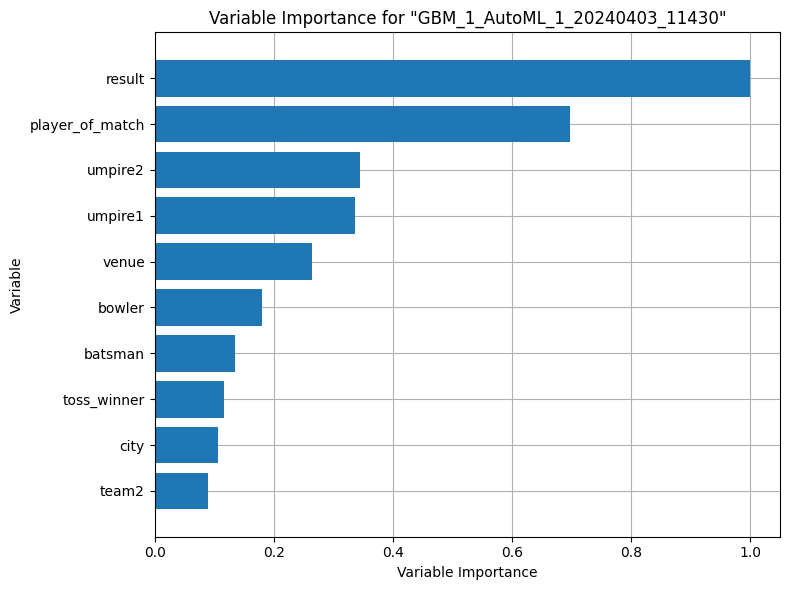

In [111]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

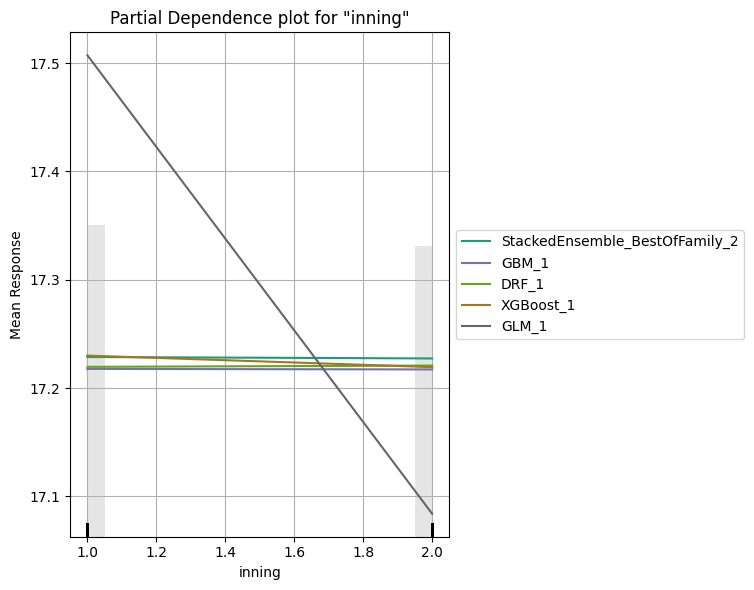

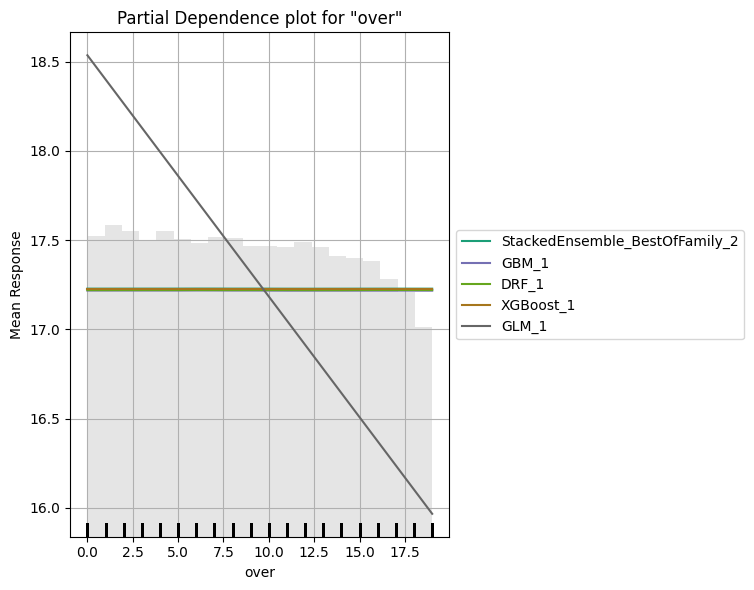

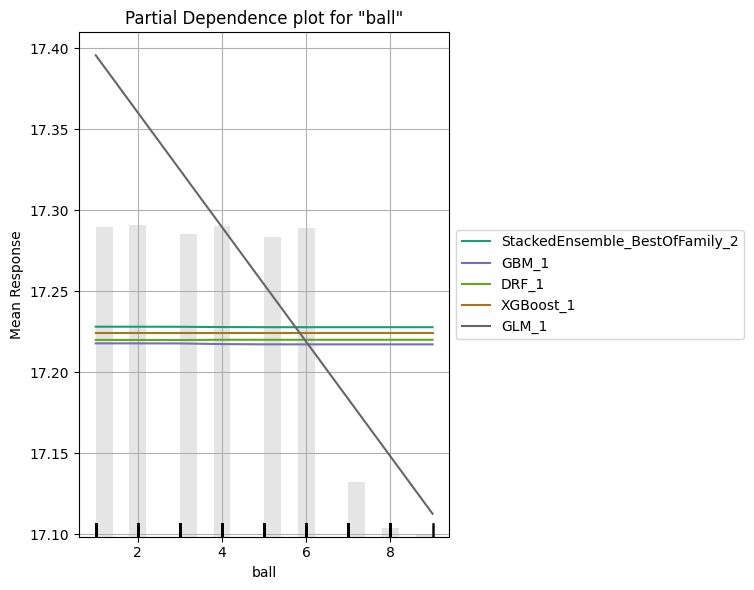

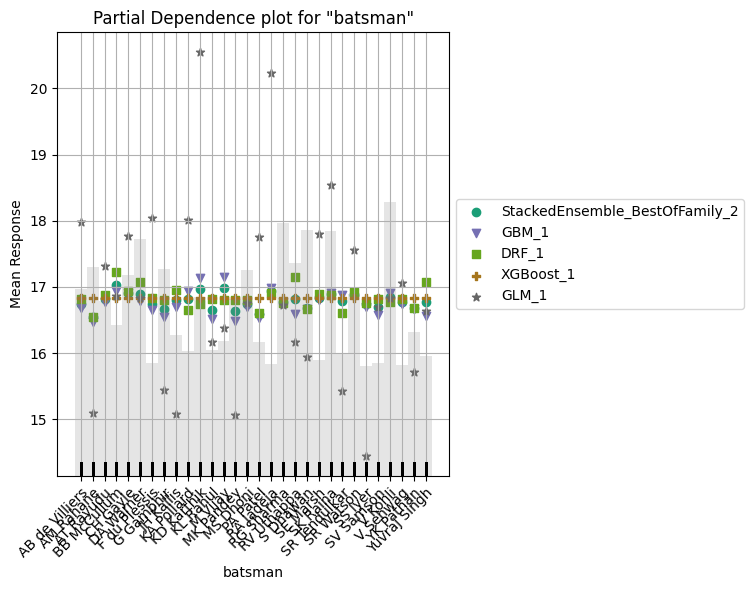

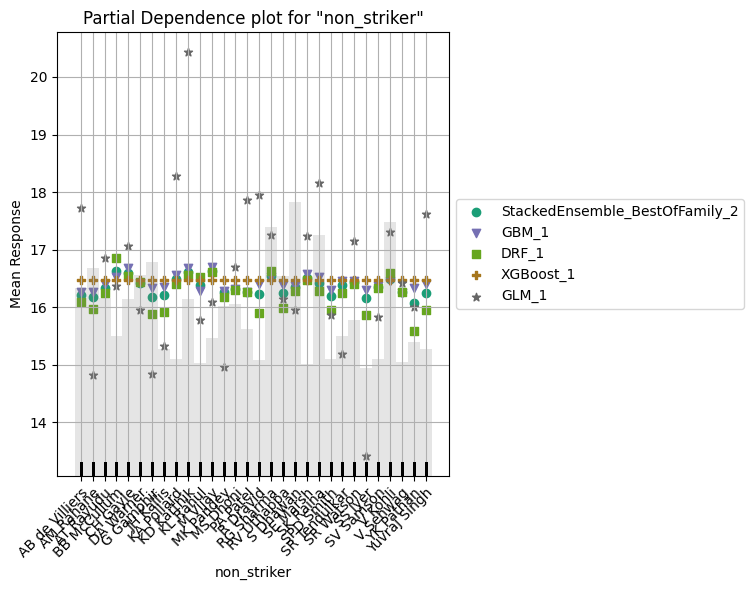

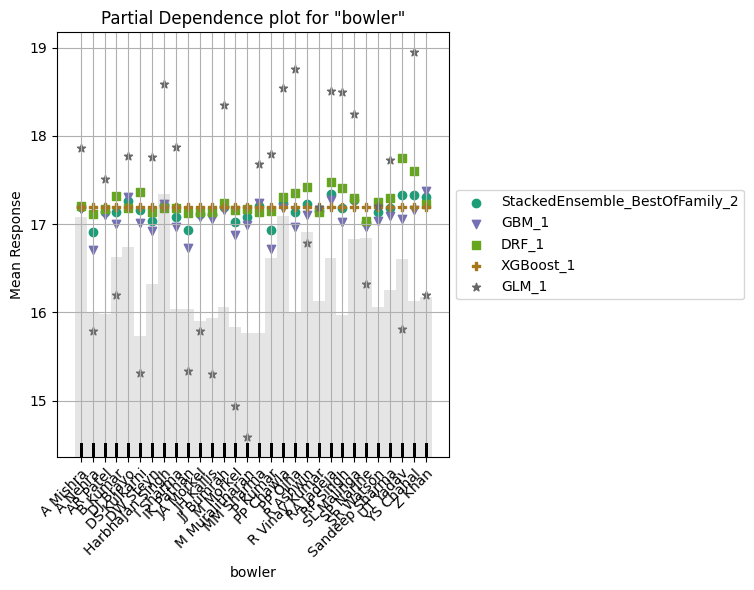

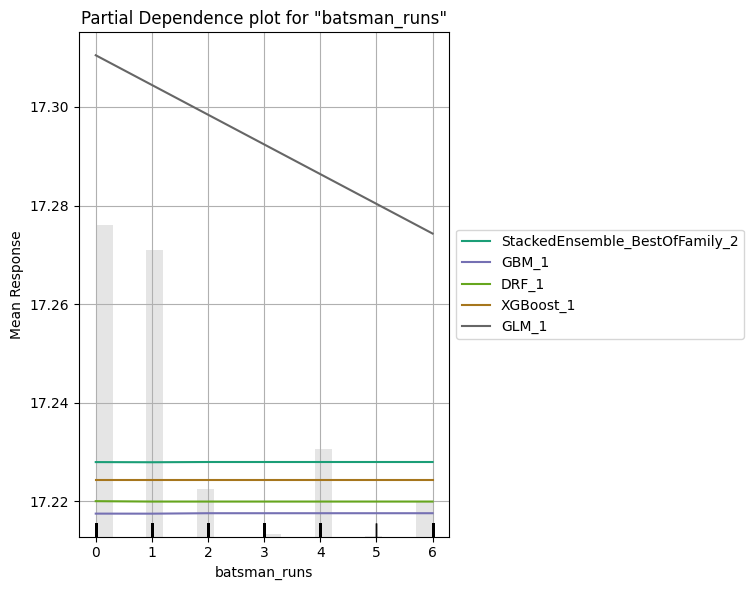

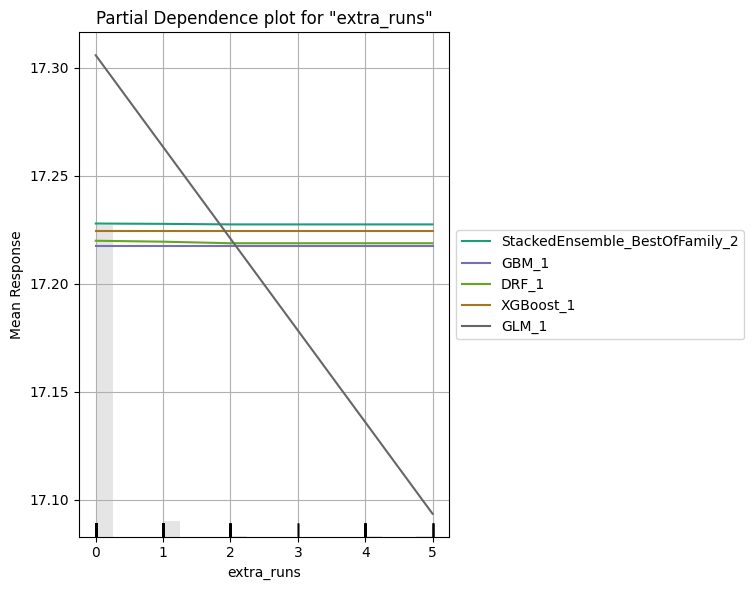

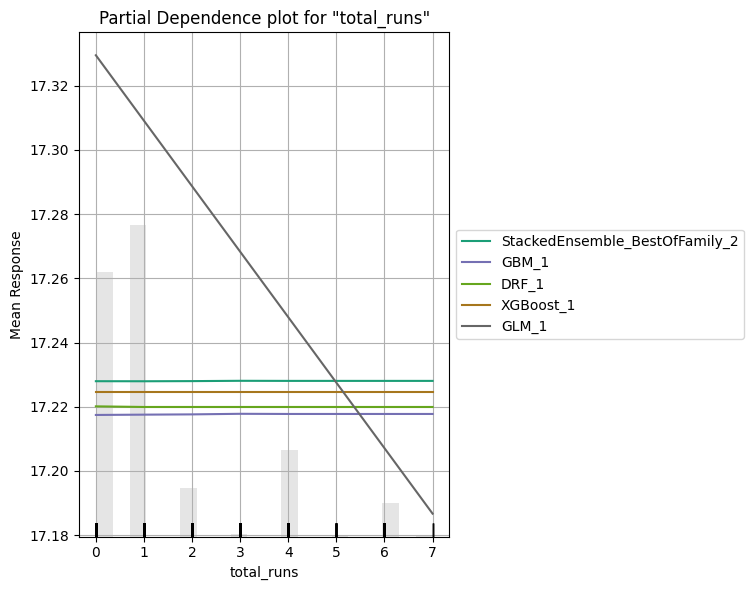

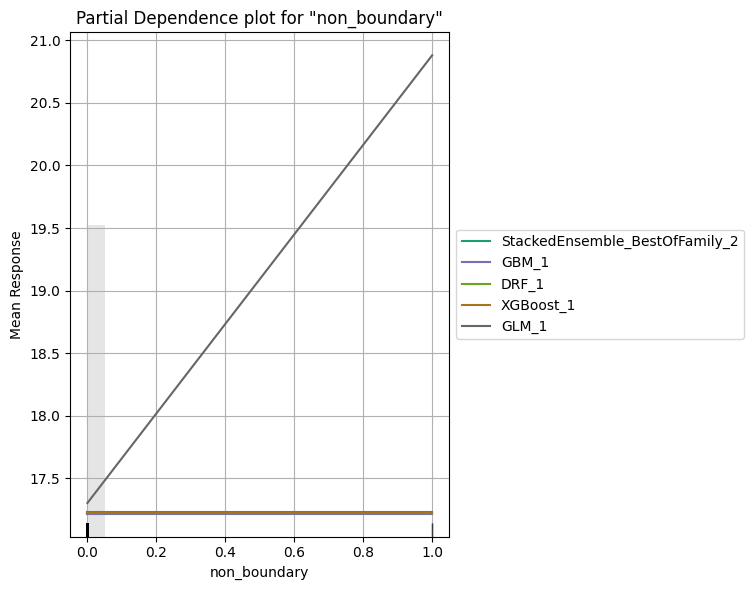

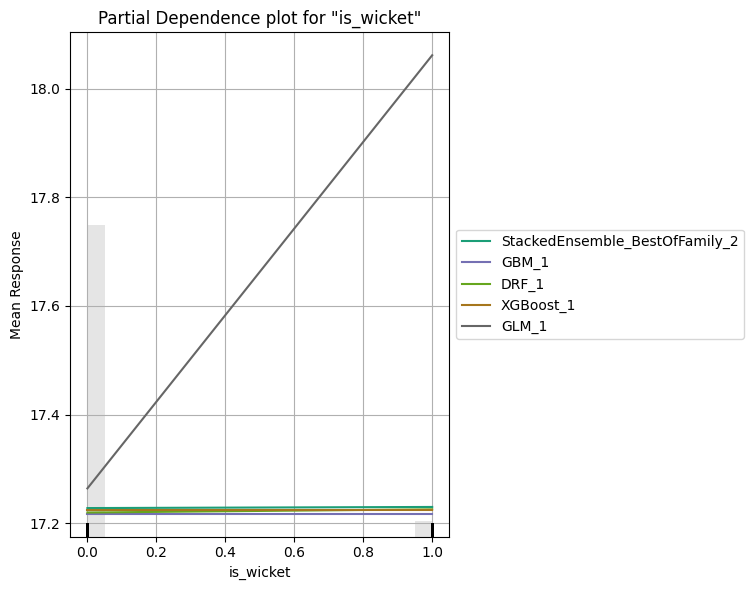

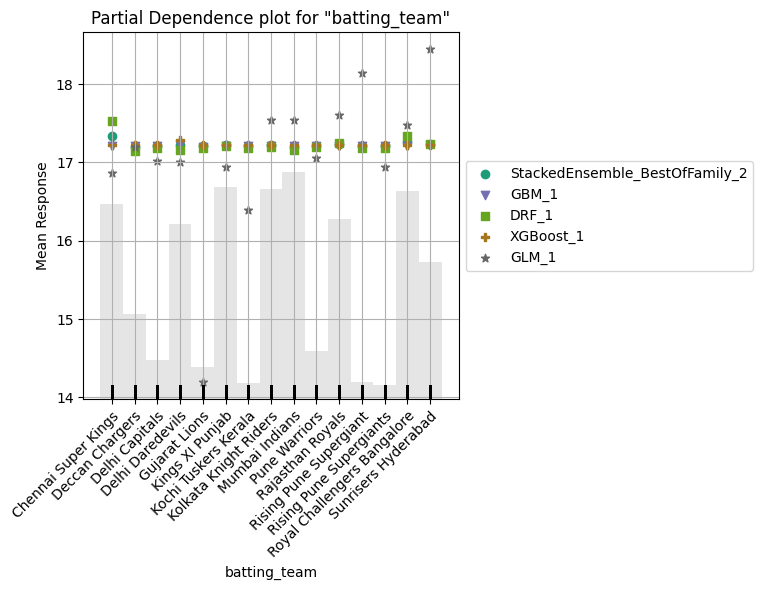

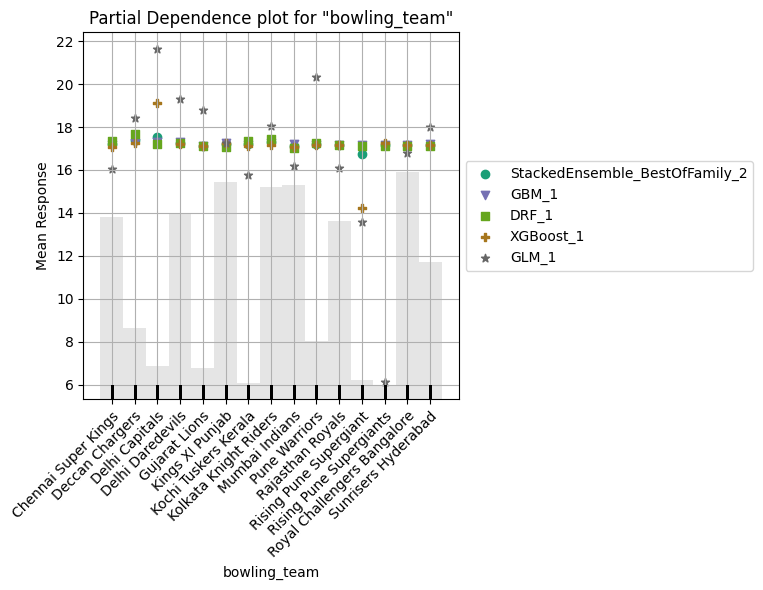

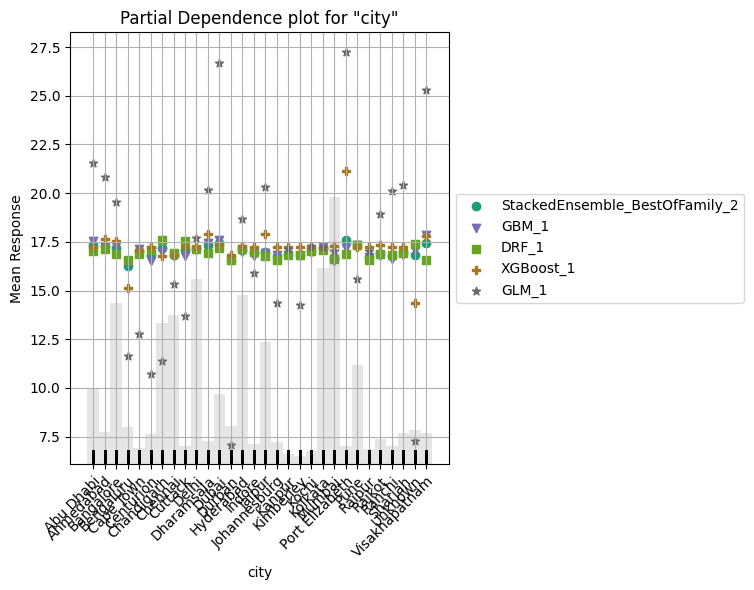

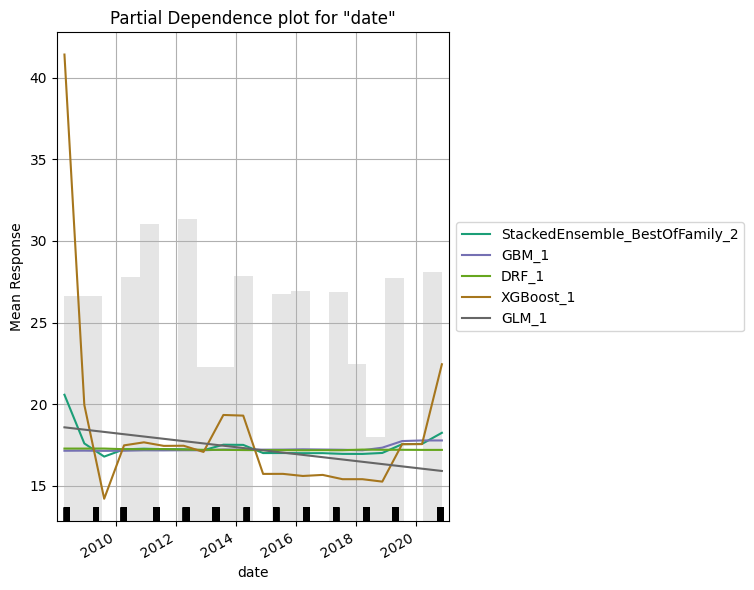

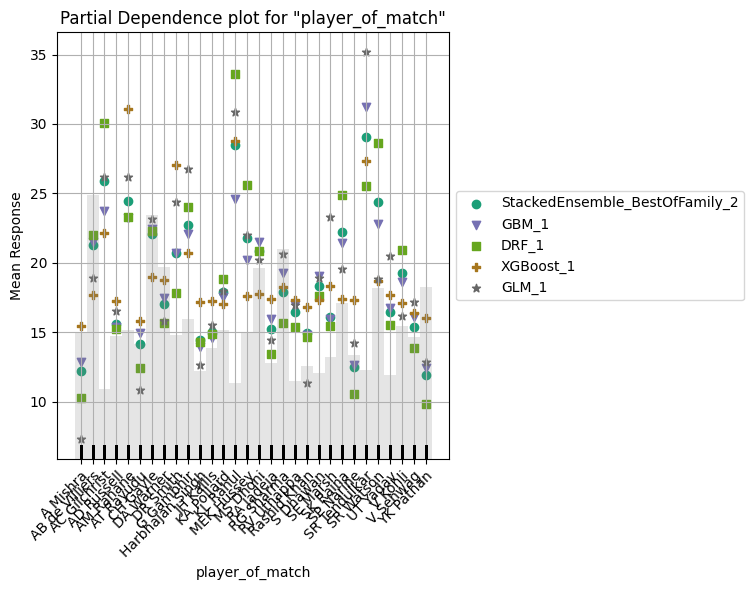

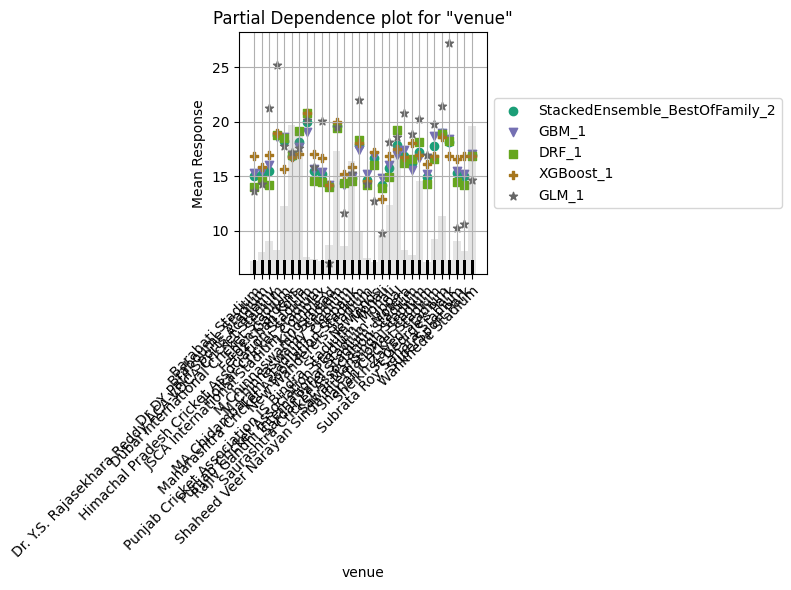

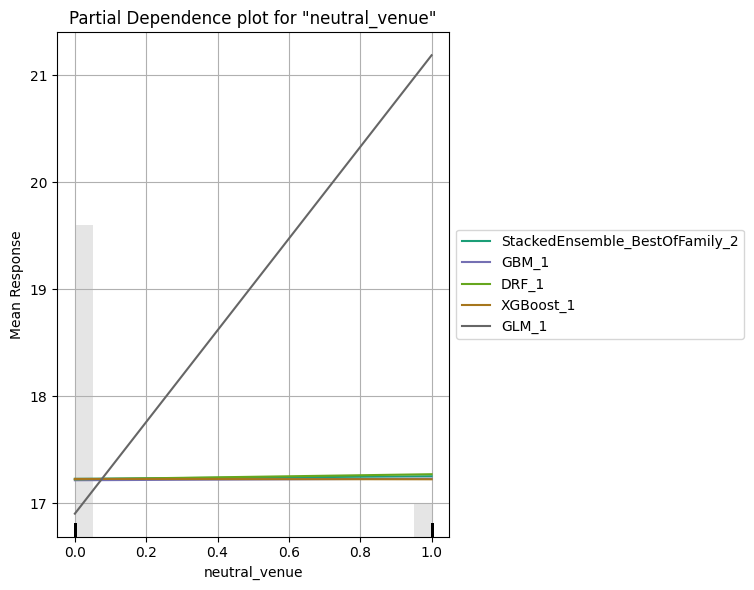

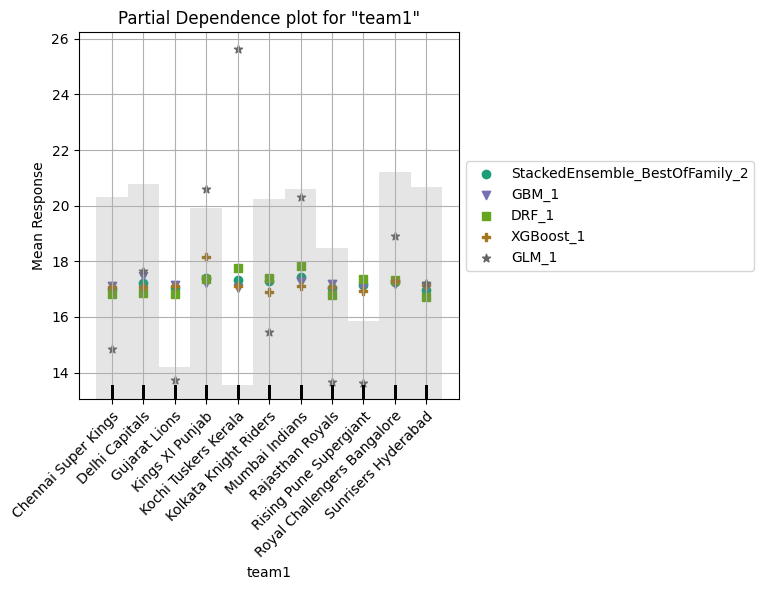

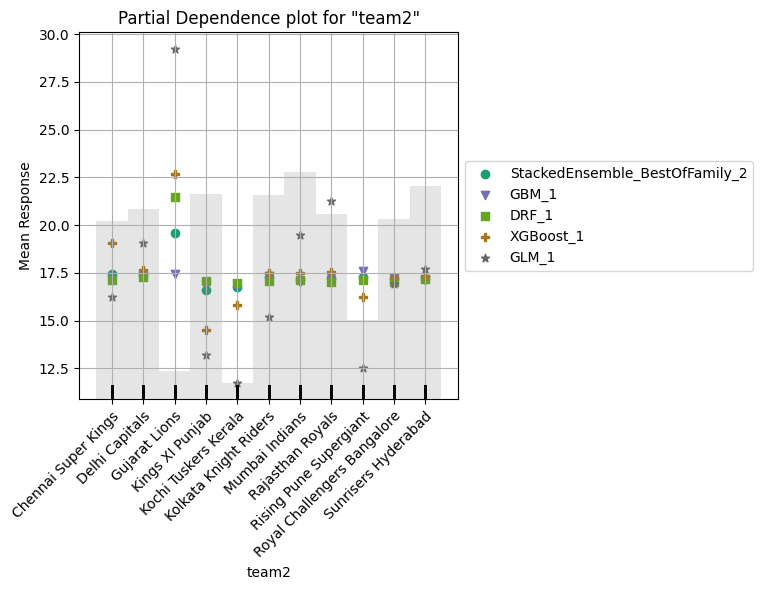

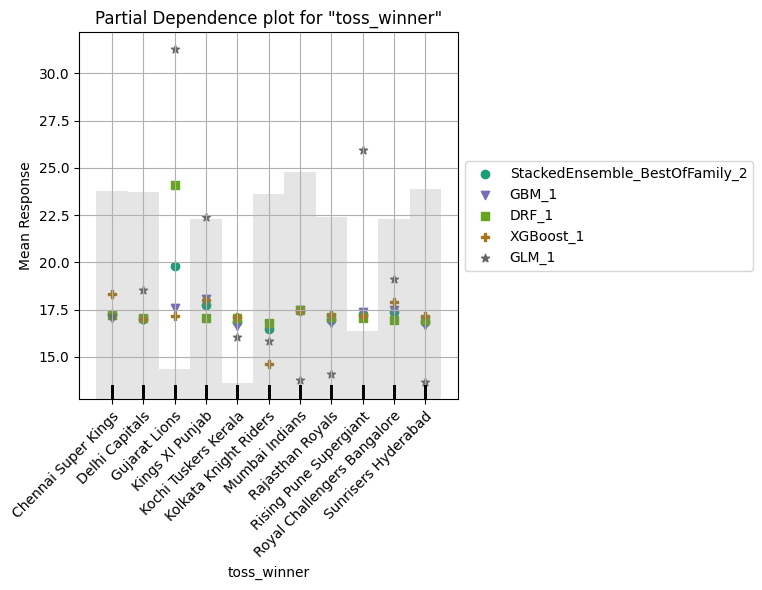

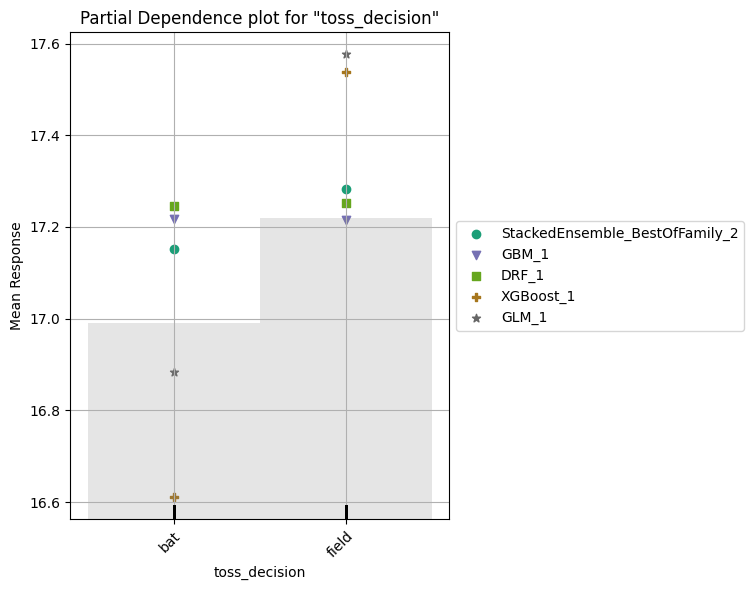

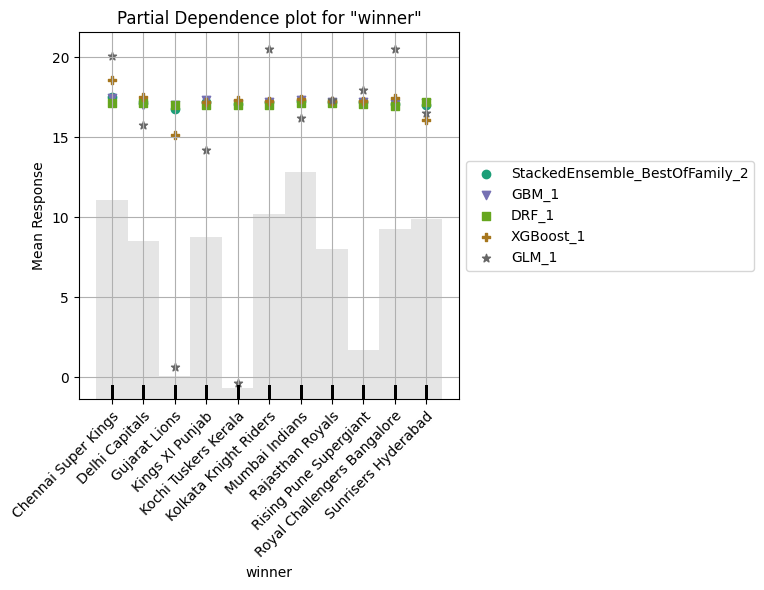

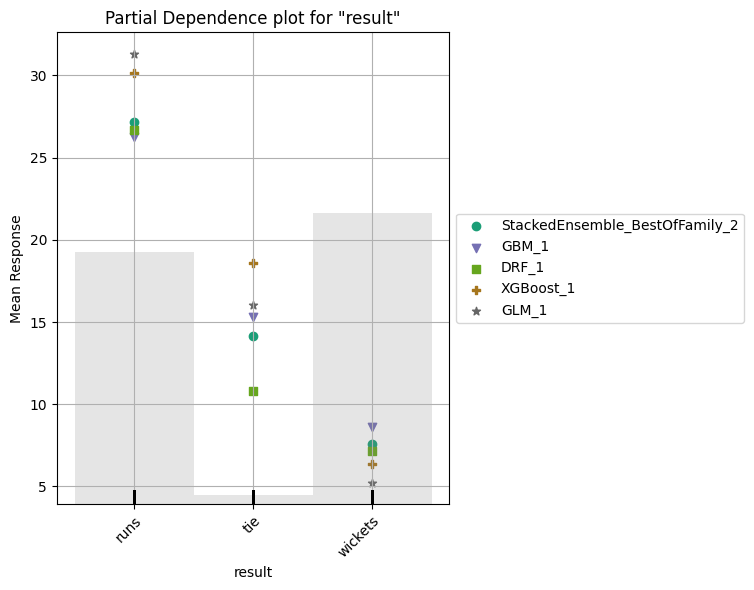

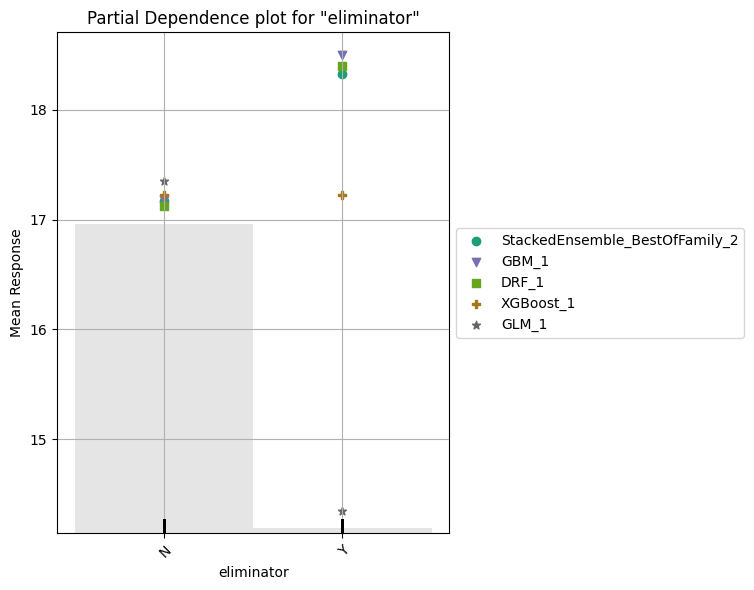

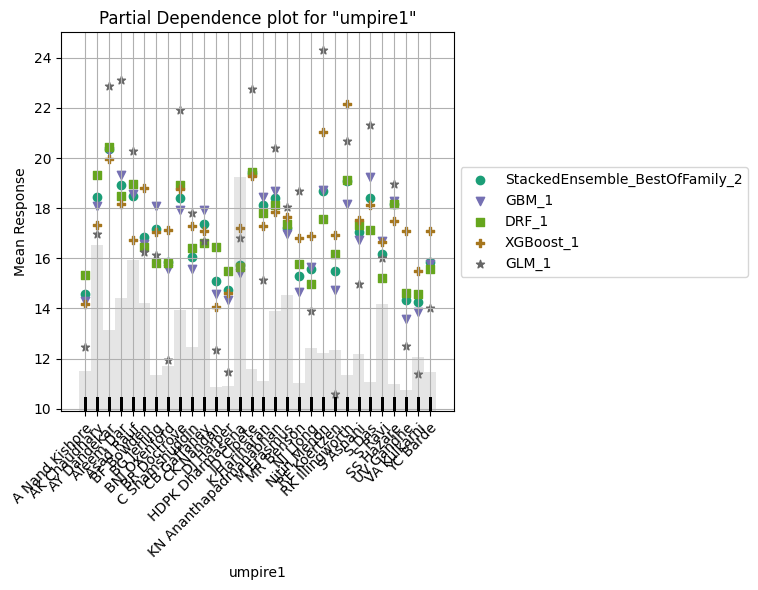

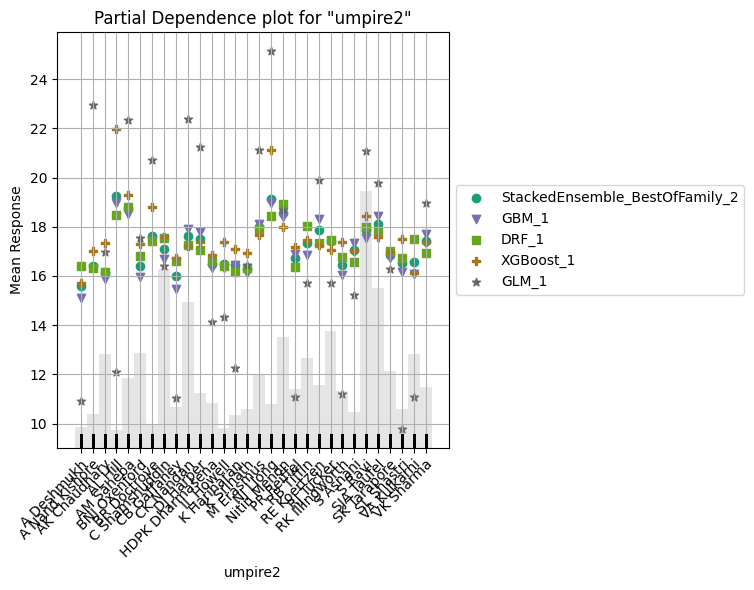

In [109]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

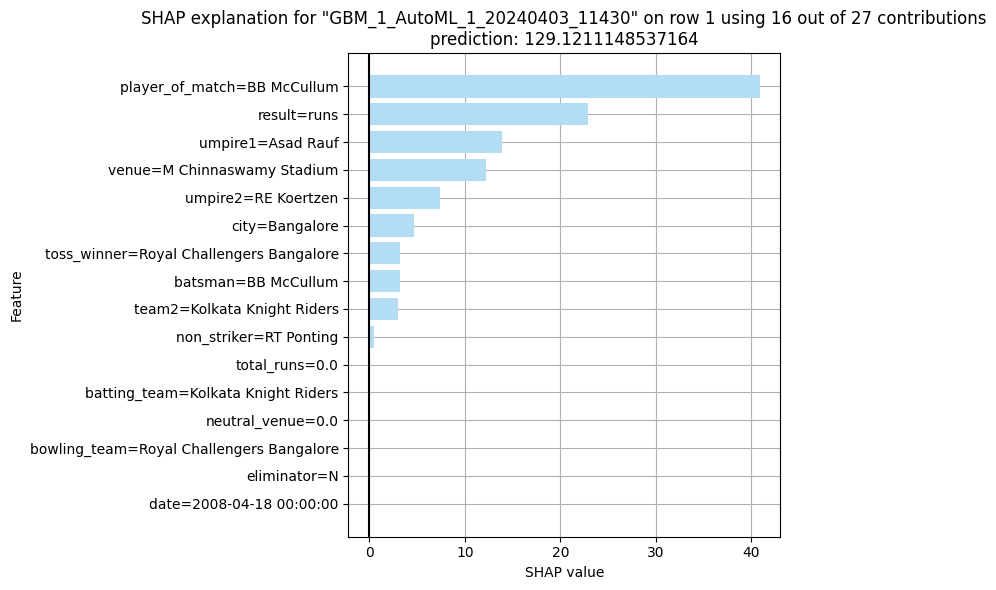

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

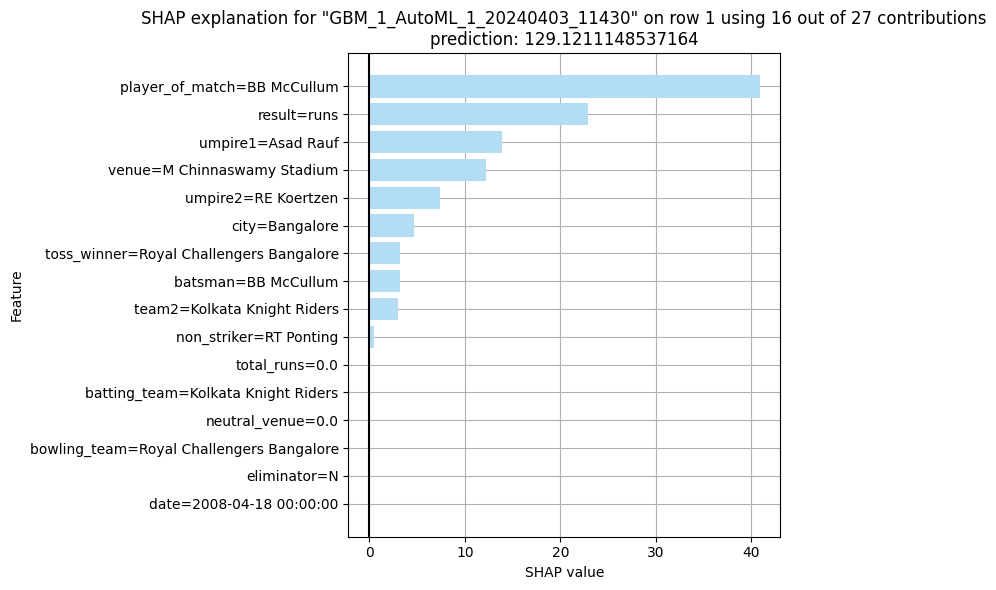

In [110]:
aml.explain_row(frame = test, row_index = 1, figsize = (8,6), exclude_explanations = "leaderboard")

# Ridge Regularization in H20

In [115]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [116]:
best_model.algo


'stackedensemble'

In [119]:
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =X_aml,
               y               =y_numeric,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712105320236_13


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.01173 )  1974                          587                            3                       py_17_sid_b2ad

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 227.84836575114866
RMSE: 15.09464692369943
MAE: 9.8301415254693
RMSLE: NaN
Mean Residual Deviance: 227.84836575114866
R^2: 0.5187704005188255
Null degrees of freedom: 154515
Residual degrees of freedom: 153928
Null deviance: 73158879.08881317
Residual deviance: 35206218.08240449
AIC: 1278493.3850133598

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 223.96157280125271
RMSE: 14.965345729426124
MAE: 9.773552948251584
RMSLE: NaN
Mean Residual Deviance: 223.96157280125271
R^2: 0.514334010025291
Null degrees of freedom: 38579
Residual degrees of freedom: 37992
Null deviance: 17791751.24926819
Residual deviance: 8640437.47867233
AIC: 319437.9829360977

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae     training_r2         validation_rmse     validation_deviance    validation_mae     validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ---------------  ------------------  ------------------  ---------------------  -----------------  -----------------
    2024-04-03 02:15:19  0.000 sec   0             73158879.08882712          473.4712203838251
    2024-04-03 02:15:19  5.232 sec   3                                                           15.09464692369943  227.84836575114866   9.8301415254693  0.5187704005188255  14.965345729426124  223.96157280125271     9.773552948251584  0.514334010025291

Variable Importances: 
variable                             relative_importance    scaled_importance    percentage
-----------------------------------  ---------------------  -------------------  --------------------
player_of_match.BB McCullum          19.20635223388672      1.0                  0.01938626613287554
player_of_match.JM Bairstow          15.041159629821777     0.7831346341385905   0.015182056435282835
result.runs                          13.080915451049805     0.6810723500098315   0.013203449833033553
result.wickets                       11.285306930541992     0.5875820037617954   0.011391021099814441
player_of_match.GC Smith             11.256826400756836     0.5860991334364815   0.011362273781047363
player_of_match.LMP Simmons          10.477068901062012     0.5455001956371913   0.010575211968158263
player_of_match.SR Tendulkar         9.88438606262207       0.5146415072604239   0.009976977222774778
player_of_match.M Vijay              9.036331176757812      0.4704865904111956   0.009120978253660646
player_of_match.Ishan Kishan         8.967309951782227      0.4668929238921672   0.009051310478129957
player_of_match.JP Duminy            7.339820384979248      0.3821558771597055   0.007408575538860544
---                                  ---                    ---                  ---
city.Ranchi                          0.0                    0.0                  0.0
bowling_team.Kochi Tuskers Kerala    0.0                    0.0                  0.0
batting_team.Chennai Super Kings     0.0                    0.0                  0.0
batting_team.Gujarat Lions           0.0                    0.0                  0.0
batting_team.Kings XI Punjab         0.0            

In [121]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =X_aml,
               y               =y_numeric,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1712105320236_14


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          926                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 341.0714138696529
RMSE: 18.468118850322924
MAE: 11.181404389479395
RMSLE: 0.7757146694889316
Mean Residual Deviance: 341.0714138696529

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 331.23881562057375
RMSE: 18.19996746207459
MAE: 11.05516091577695
RMSLE: 0.7737703331715539
Mean Residual Deviance: 331.23881562057375

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-04-03 02:16:48  0.009 sec   0                  21.7594          14.7507         473.471              21.4748            14.621            461.165
    2024-04-03 02:16:48  0.259 sec   1                  21.1459          14.1063         447.15               20.8597            13.9745           435.126
    2024-04-03 02:16:48  0.417 sec   2                  20.6346          13.506          425.786              20.347             13.3713           414
    2024-04-03 02:16:48  0.564 sec   3                  20.2088          13.0266         408.394              19.9207            12.8907           396.832
    2024-04-03 02:16:49  0.705 sec   4                  19.8566          12.5693         394.283              19.5681            12.4318           382.911
    2024-04-03 02:16:49  0.890 sec   5                  19.5651          12.2024         382.792              19.2769            12.0649           371.598
    2024-04-03 02:16:49  1.033 sec   6                  19.3118          12.0458         372.947              19.0311            11.9122           362.182
    2024-04-03 02:16:49  1.204 sec   7                  19.0764          11.7038         363.909              18.7961            11.5698           353.292
    2024-04-03 02:16:49  1.366 sec   8                  18.8489          11.5606         355.28               18.5719            11.4302           344.916
    2024-04-03 02:16:49  1.528 sec   9                  18.6556          11.4517         348.032              18.3868            11.3257           338.073
    2024-04-03 02:16:50  1.635 sec   10                 18.4681          11.1814         341.071              18.2               11.0552           331.239

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  -------------------
result           86754424.0             1.0                  0.8057205152581381
player_of_match  20918674.0             0.24112515576150906  0.19427948474186188
inning           0.0                    0.0                  0.0
over             0.0                    0.0                  0.0
ball             0.0                    0.0                  0.0
batsman          0.0                    0.0                  0.0
non_striker      0.0                    0.0                  0.0
bowler           0.0                    0.0                  0.0
batsman_runs     0.0                    0.0                  0.0
extra_runs       0.0                    0.0                  0.0
---              ---                    ---                  ---
venue         

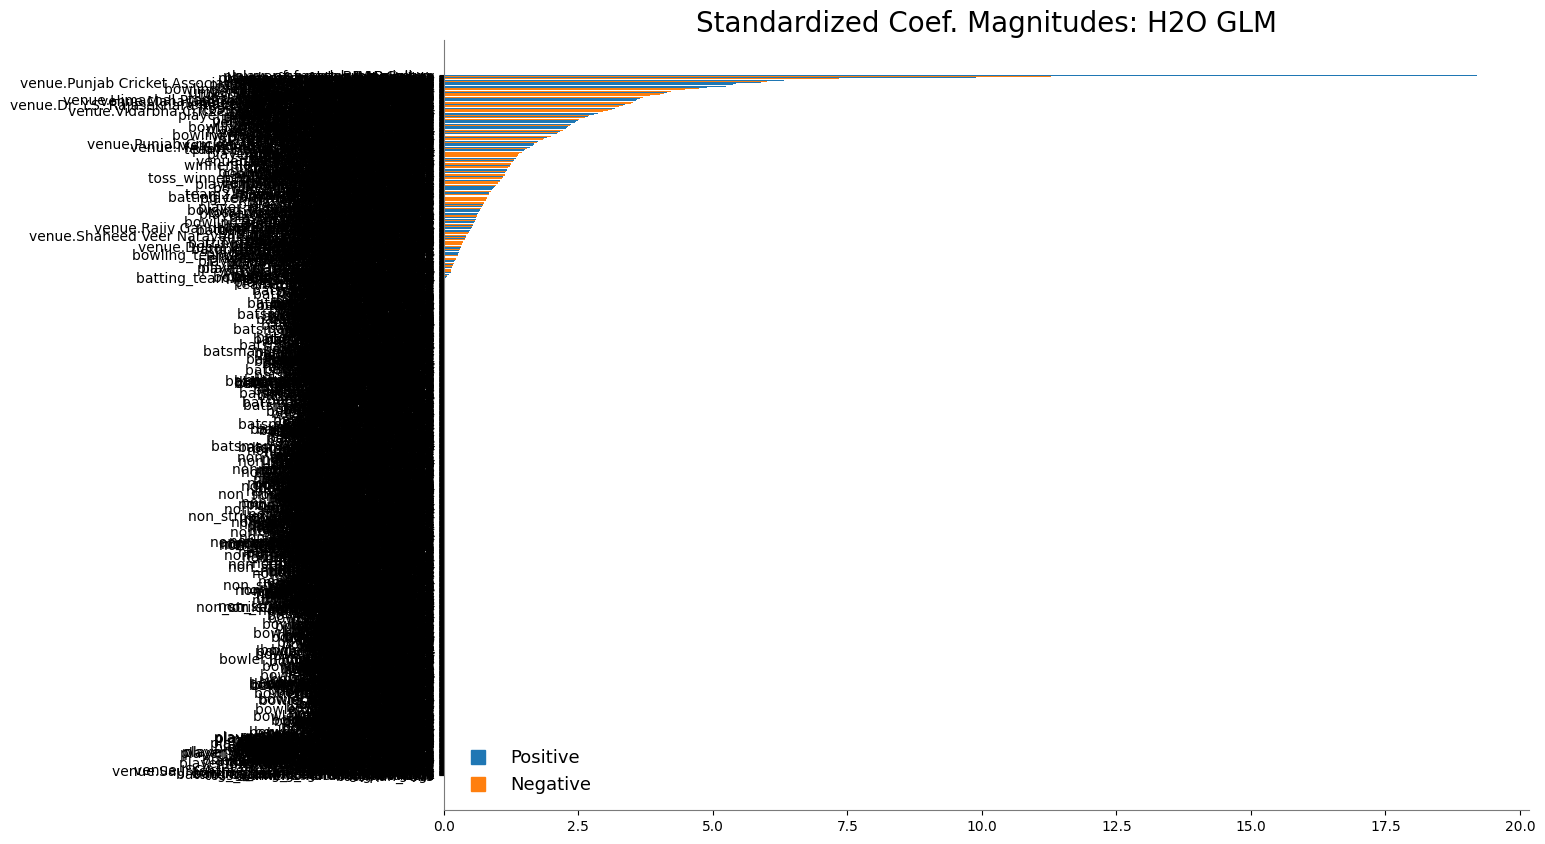

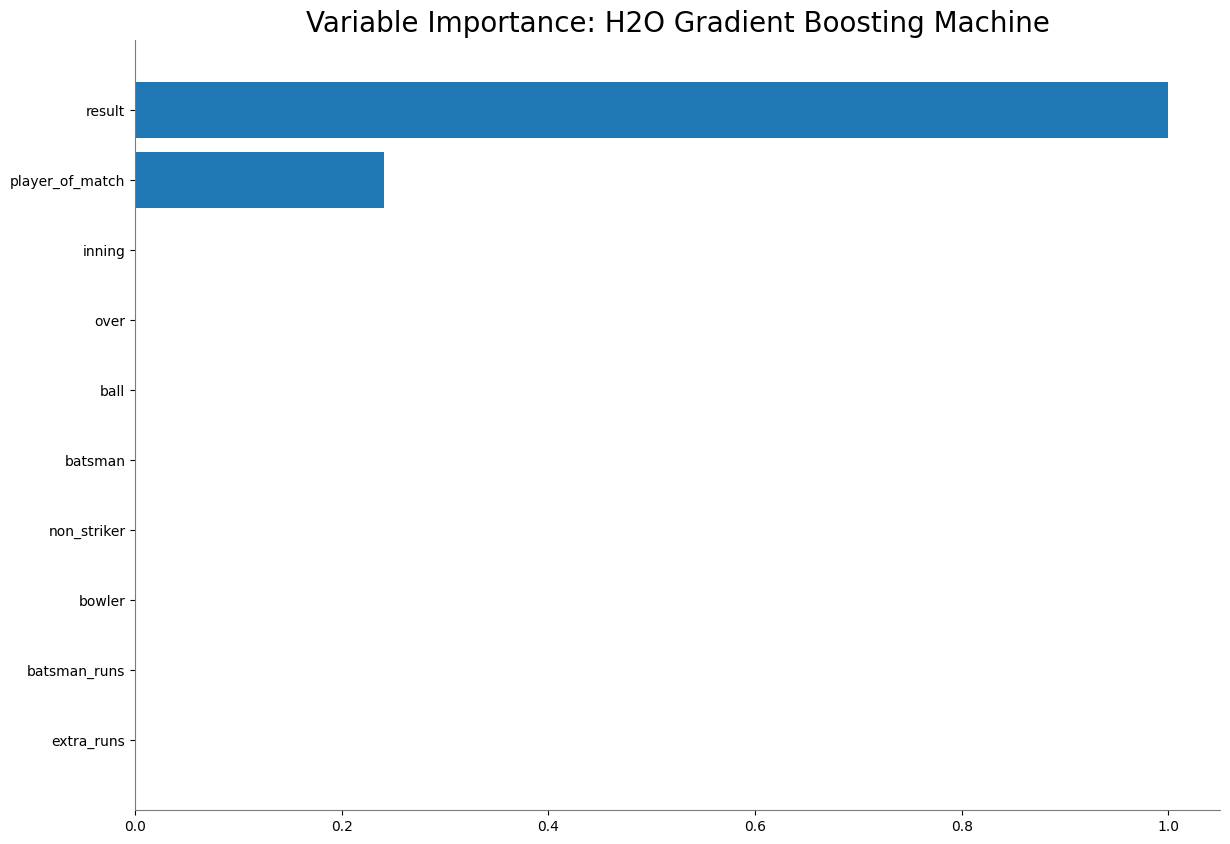

<Figure size 640x480 with 0 Axes>

In [122]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [125]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
data_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
data_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0.1)
#Training on the regularized model
data_glm_regularization.train(x = X_aml, y = y_numeric, training_frame = df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712105320236_15


GLM Model: summary
    family    link      regularization                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.1, lambda = 0.001 )  1974                          1792                           2                       py_20_sid_b2ad

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 172.0331386752112
RMSE: 13.11614038790418
MAE: 8.955256898807416
RMSLE: NaN
Mean Residual Deviance: 172.0331386752112
R^2: 0.6350595947885923
Null degrees of freedom: 154607
Residual degrees of freedom: 152815
Null deviance: 72882309.34278136
Residual deviance: 26597699.504297055
AIC: 1238220.108501079

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  -----------------  ------------------
    2024-04-03 02:22:09  0.000 sec   0             72882309.34277582          471.4006347845895
    2024-04-03 02:22:09  3.945 sec   2                                                           13.11614038790418  172.0331386752112    8.955256898807416  0.6350595947885923

Variable Importances: 
variable                        relative_importance    scaled_importance    percentage
------------------------------  ---------------------  -------------------  ---------------------
player_of_match.BB McCullum     39.699344635009766     1.0                  0.009905846684943674
player_of_match.JM Bairstow     30.813276290893555     0.776165868081363    0.007688580091300198
player_of_match.GC Smith        30.678598403930664     0.7727734219792648   0.0076549750403258785
player_of_match.LMP Simmons     27.15355110168457      0.6839798326982607   0.0067753993583023935
player_of_match.Ishan Kishan    27.02171516418457      0.680658973406701    0.0067425034352979335
player_of_match.BA Bhatt        23.835702896118164     0.6004054503987482   0.005947524340454553
player_of_match.CH Morris       17.771211624145508     0.44764496209021953  0.004434302363753138
player_of_match.M Vijay         17.253482818603516     0.4346037189588299   0.004305117808712517
player_of_match.M Muralitharan  16.64043426513672      0.4191614349840419   0.004152148911192905
player_of_match.SR Tendulkar    16.146638870239258     0.4067230584960332   0.004028936260693082
---                             ---                    ---                  ---
bowler.RR Bose                  0.0                    0.0                  0.0
bowler.RS Gavaskar              0.0                    0.0                  0.0
bowler.S Dhawan                 0.0                    0.0                  0.0
bowler.SN Khan                  0.0                    0.0                  0.0
bowler.SPD Smith                0.0                    0.0                  0.0
bowler.Tejas Baroka             0.0                    0.0                  0.0
venue.Green Park                0.0                    0.0                  0.0
city.Kanpur                     0.0                    0.0                  0.0
batting_team.Kings XI Punjab    0.0                    0.0                  0.0
eliminator.N                    0.0                    0.0                  0.0
[1974 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Assignment Questions

Is the relationship significant?
Yes the relationship seems significant, the high R^2 value of 0.9996580672756031 suggests a significant relationship between the predictors and the response variable. This indicates that the model explains nearly all the variability of the response data around its mean and also as the "batsman_runs" and "total_runs" do make up the most part of the "total_runs" and is valid.

The presence of large SHAP values for certain features suggests that the model is finding significant relationships between these features and the target variable. The fact that "batsman_runs=0.0" has a large negative SHAP value indicates it is an important feature in the prediction.

Are any model assumptions violated?

No they are not because we assumed "batsman_runs" and "total_runs" as the variables and it proved right in this context.

Is there any multicollinearity in the model?

Yes there is. "batsman_runs" and "total_runs" go hand in hand. Correlation Matric and the Variable Importance plot shows the relative importance of the most important variables in the model and from that we can see there is multicollinearity.

In the multivariate models are predictor variables independent of all the other predictor variables?

No, they are dependant. From the Variable Importance plot we can see plent

In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

The variable importances listed show that "player_dismissed.NA" and "dismissal_kind.NA" are the most significant predictors.

Does the model make sense?

Assignment 3

### **1. Logistic Regression**

In [130]:
print(feature_columns)

['over', 'ball', 'extra_runs', 'batsman_runs', 'is_wicket']


In [132]:
from sklearn.linear_model import LinearRegression


# Create a linear regression model
model_lr = LinearRegression()
# feature_columns = [ 'over','ball','extra_runs', 'batsman_runs','is_wicket']

# Fit the model to the data
model_lr.fit(ipl_data[['total_runs']], ipl_data[feature_columns])

# Print the regression coefficient
print(model_lr.coef_)

# Interpret the regression coefficient
print("For every one unit increase in result margin, the predicted winner probability increases by", model_lr.coef_[0])

[[ 0.31013383]
 [ 0.00756492]
 [ 0.01503621]
 [-0.02433724]
 [ 1.        ]]
For every one unit increase in result margin, the predicted winner probability increases by [0.31013383]


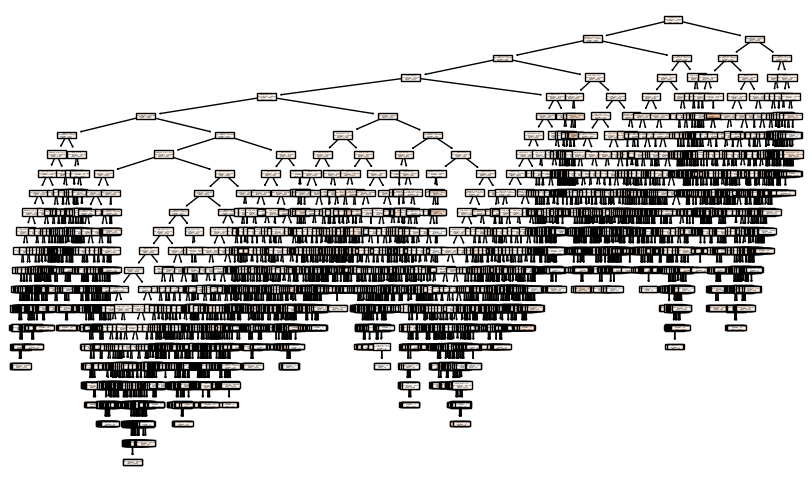

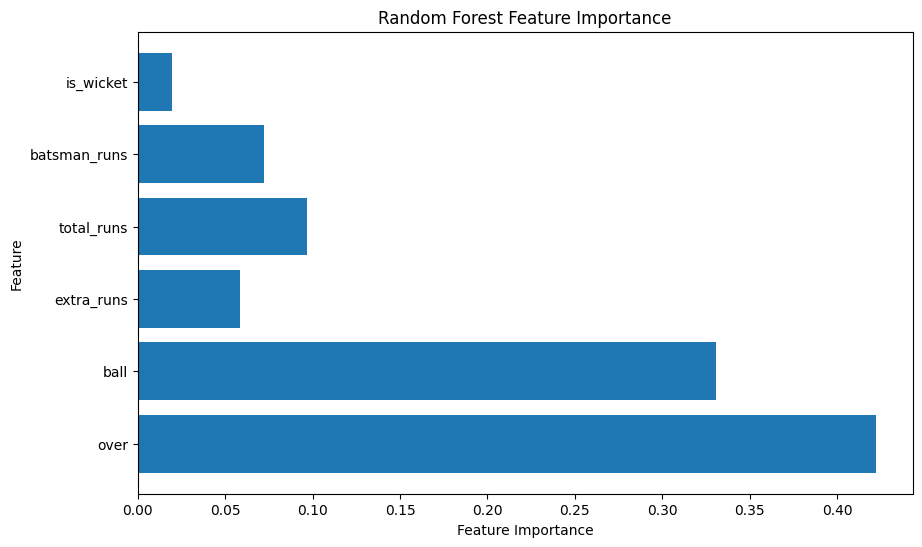

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import sklearn.tree as tree

feature_columns_1 = [ 'over','ball','extra_runs', 'total_runs', 'batsman_runs','is_wicket']
X = new_dataset[feature_columns_1]
y = new_dataset['result_margin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

plt.figure(figsize=(10,6))
tree.plot_tree(forest_model.estimators_[0], filled=True, feature_names=feature_columns_1)
plt.show()

# Visualize feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_columns_1, forest_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

**4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.**

In [138]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.3 MB/s eta 0:00:00


In [153]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [154]:
explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test)


100%|===================| 38598/38620 [17:39<00:00]       

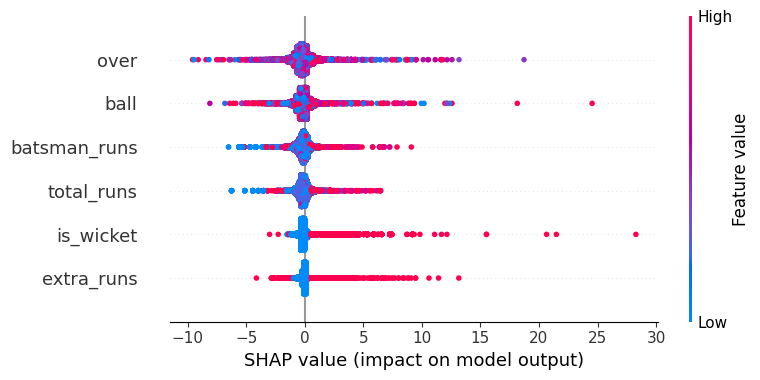

In [156]:
shap.summary_plot(shap_values, X_test)

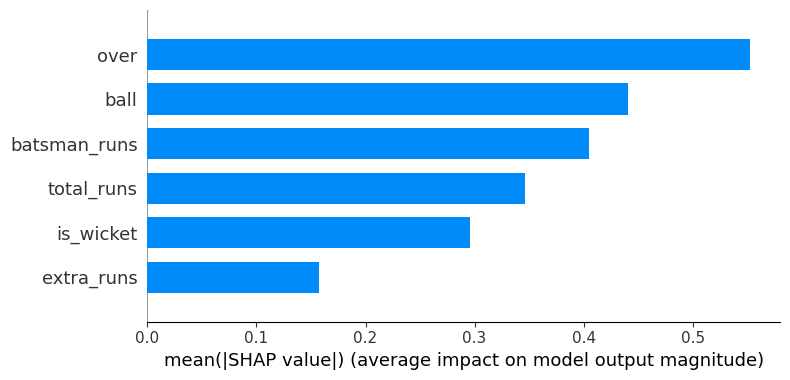

In [157]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [159]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Since all features have been treated as numerical due to encoding, apply the numerical pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, feature_columns_1)
])

# Create the modeling pipeline including preprocessing and the regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['over', 'ball', 'extra_runs',
                                                   'total_runs', 'batsman_runs',
                                                   'is_wicket'])])),
                ('regressor', LinearRegression())])

In [160]:
nan_frame = pd.DataFrame(columns=feature_columns_1, index=[0])

nan_frame

over ball extra_runs total_runs batsman_runs is_wicket
0  NaN  NaN        NaN        NaN          NaN       NaN

In [161]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 17.299


The expected Value of the output 17.299 which is the expected results_margin that is to be found

In [162]:
X_test.iloc[0: 1]

over  ball  extra_runs  total_runs  batsman_runs  is_wicket
16345    17     4           0           0             0          0

In [163]:
sample_prediction = round(pipeline.predict(X_test.iloc[0:1])[0], 3)

actual_value = y_test.iloc[0]

# Print the prediction and the actual value
print(f"Current Prediction: {sample_prediction}, Actual value: {actual_value}")

Current Prediction: 17.123, Actual value: 27.0


In [164]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 38621it [07:34, 83.90it/s]                           


In [165]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

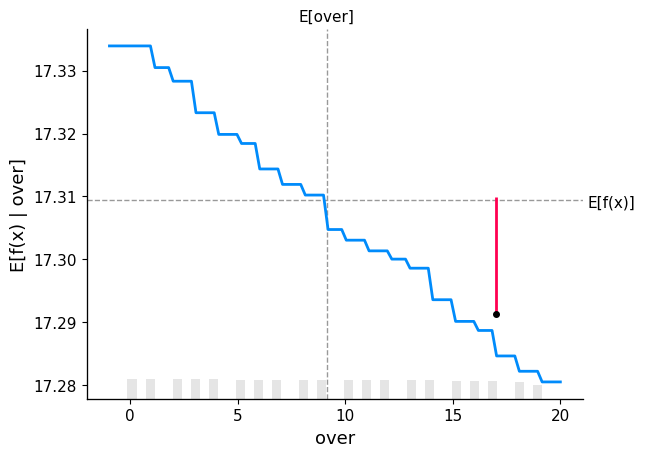

In [166]:
partial_dependence_plot('over', 0)

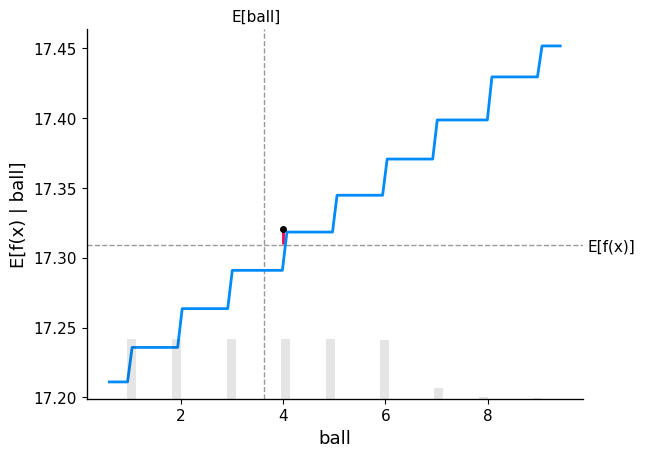

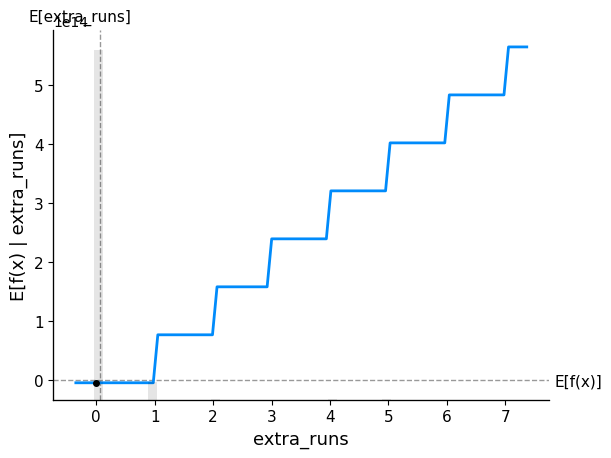

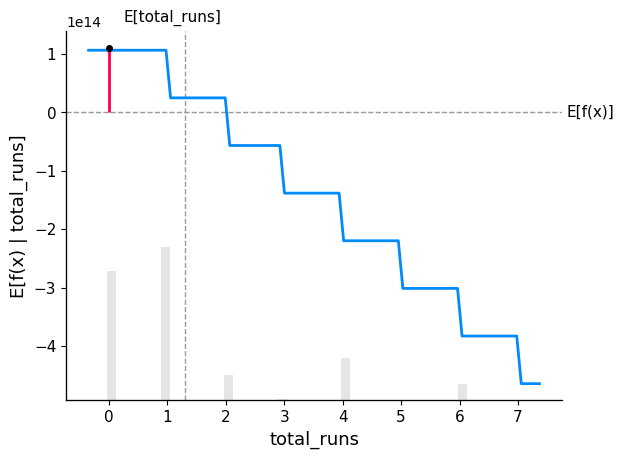

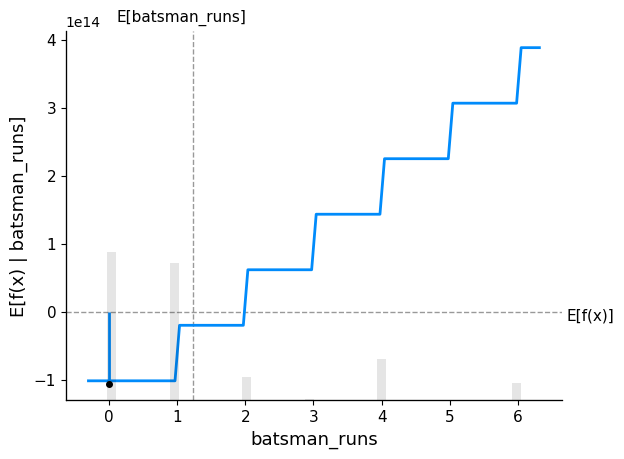

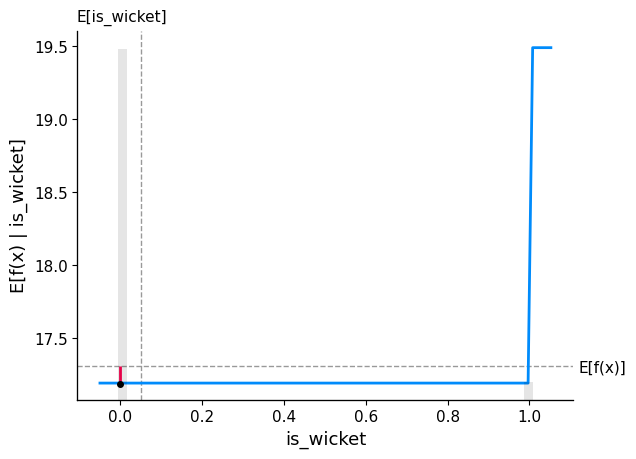

In [168]:
partial_dependence_plot('ball', 0)
print(" ")
partial_dependence_plot('extra_runs', 0)
print(" ")
partial_dependence_plot('total_runs', 0)
print(" ")
partial_dependence_plot('batsman_runs', 0)
print(" ")
partial_dependence_plot('is_wicket', 0)

Since the dataset involves actual IPL runs and data, the inference from PDP is jusitifyable.

Example - Extra Runs graph shows us that as the number of extra runs increases the expected value also increase in a non linear format and such is the data in a cricket format.

In [169]:
shap.initjs()

In [170]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

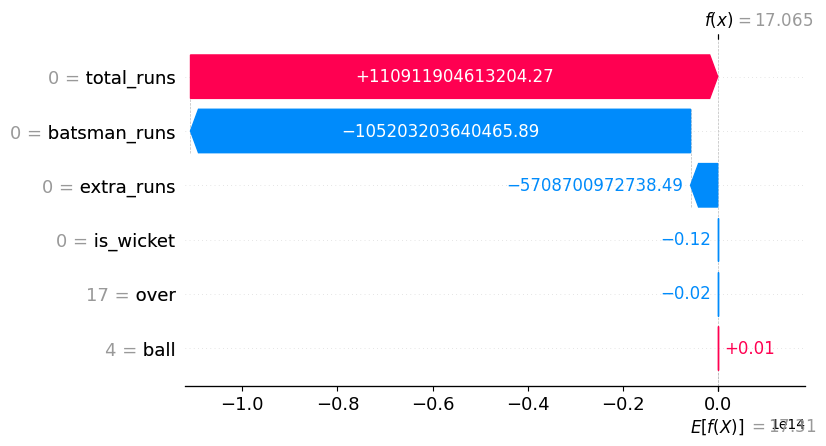

In [171]:
sample_feature_importance(0, 'waterfall')

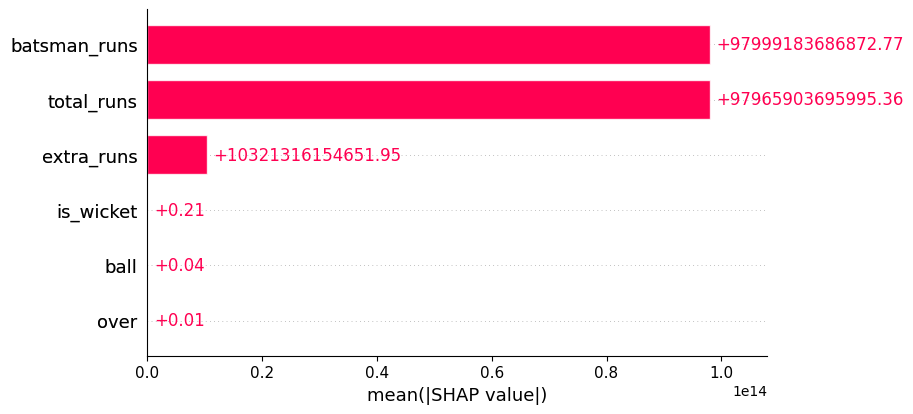

In [172]:
shap.plots.bar(shap_values)

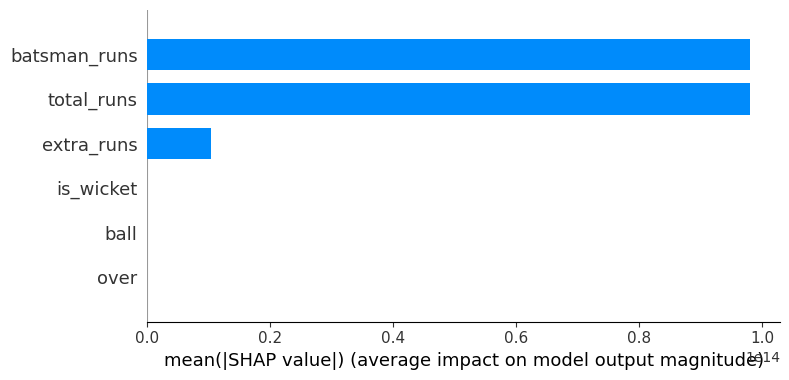

In [173]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

# **License**
MIT License

Copyright (c) 2024 Shreyas Sreedhar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References:**
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/
all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - www.openai.com/chatgpt

Professor's AutoML Notebook- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynbLinks to an external site.